In [142]:
from PIL import Image

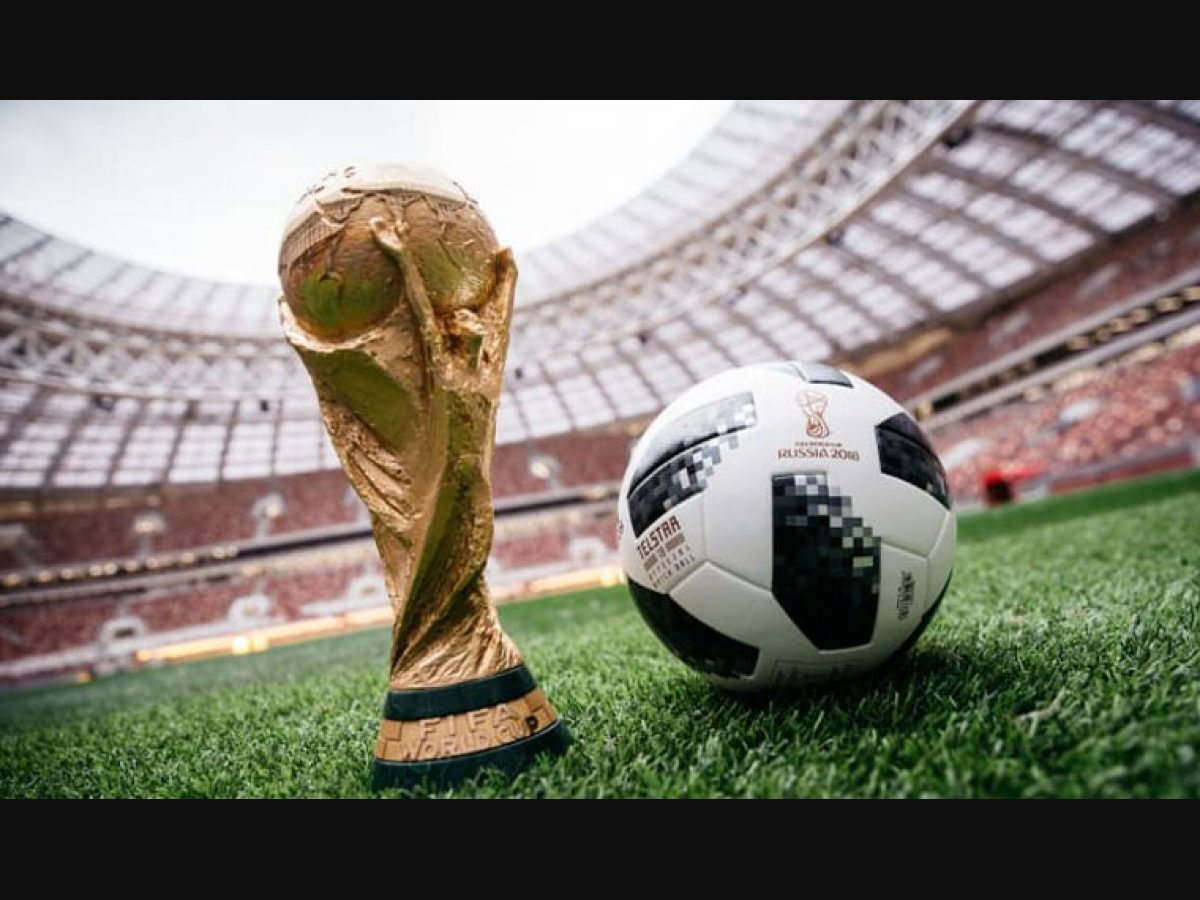

In [143]:
fifa_image = Image.open(r"C:\Users\srisa\Downloads\FIFA 2019.jpg")
fifa_image

# EXTENSIVE ANALYSIS AND VISUALIZATION USING PYTHON WITH FIFA WORLD CUP 2019 DATA SET 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# READ THE DATASET

In [3]:
fifa = pd.read_csv(r"C:\Users\srisa\Desktop\FIFA.csv")
fifa.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [4]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### VIEW THE SUMMARY OF THE DATA SET

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

- This dataset contains 89 variables.

- Out of the 89 variables, 44 are numerical variables. 38 are of float64 data type and remaining 6 are of int64 data type.

- The remaining 45 variables are of character data type.


### Deleting a column

In [6]:
fifa = fifa.drop("Unnamed: 0", axis=1)
fifa

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

       ... Composure Marking  StandingTackle SlidingTackle  GKDiving  \
0      ...      96.0    33.0            28.0          26.0       6.0   
1      ...      95.0    28.0            31.0          23.0       7.0   
2      ...      94.0    27.0            24.0          33.0       9.0   
3      ...      68.0    15.0            21.0          13.0      90.0   
4      ...      88.0    68.0            58.0          51.0      15.0   
...    ...       ...     ...             ...           ...       ...   
18202  ...      45.0    40.0            48.0          47.0      10.0   
18203  ...      42.0    22.0            15.0          19.0      10.0   
18204  ...      41.0    32.0            13.0          11.0       6.0   
18205  ...      46.0    20.0            25.0          27.0      14.0   
18206  ...      43.0    40.0            43.0          50.0      10.0   

       GKHandling  GKKicking GKPositioning GKReflexes Release Clause  
0          

In [7]:
fifa["Body Type"].value_counts()  

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

#### Explore `Age` variable

### Visualize distribution of `Age` variable with Seaborn `distplot()` function

- Seaborn `distplot()` function flexibly plots a univariate distribution of observations.

- This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions.

* - So, let's visualize the distribution of `Age` variable with Seaborn `distplot()` function.

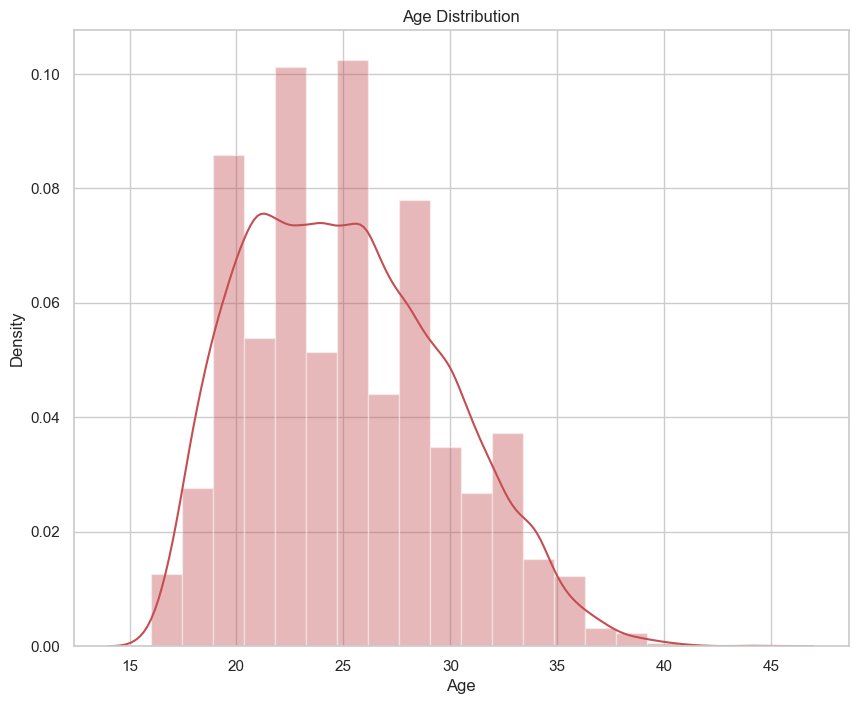

In [8]:
fig , ax = plt.subplots(figsize=(10,8,))
x = fifa["Age"]
ax = sns.distplot(x,bins=20,color="r")
plt.title("Age Distribution")   
plt.show()

-We can that the `Age` variable is slightly positively skewed.

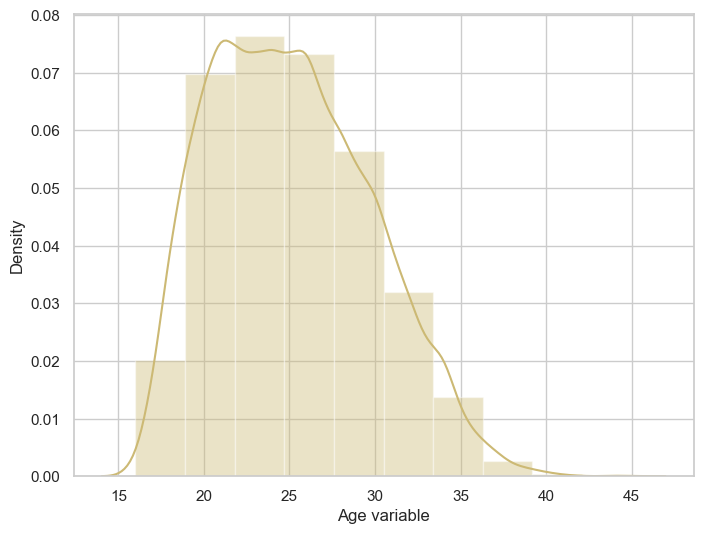

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10,color="y")
plt.show()

#### - We can also plot the distribution in the vertical axix

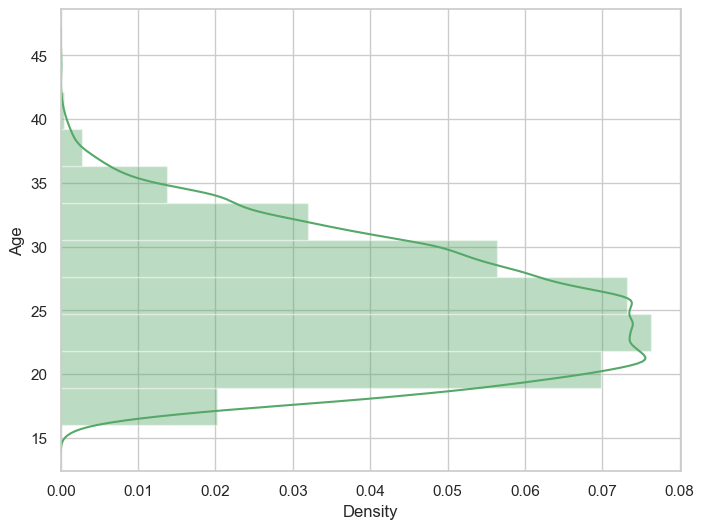

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax = sns.distplot(x, bins=10,color="g",vertical=True)


plt.show()

### Seaborn Kernel Density Estimation (KDE) Plot


- The `kernel density estimate (KDE)` plot is a useful tool for plotting the shape of a distribution. 

- Seaborn kdeplot is another seaborn plotting function that fits and plot a univariate or bivariate kernel density estimate.

- Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis.


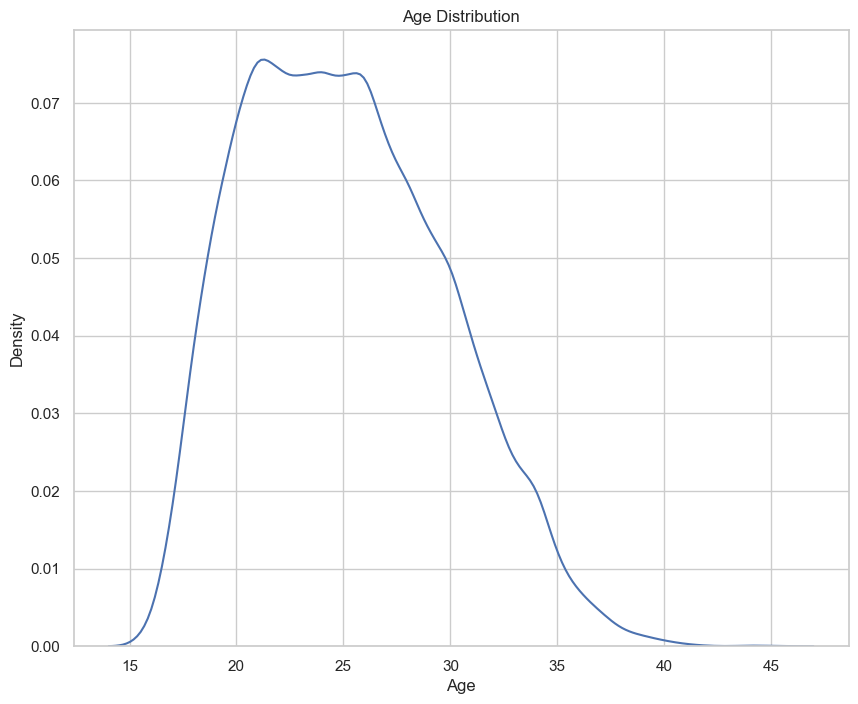

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
x = fifa['Age']
ax = sns.kdeplot(x,color="b")
plt.title("Age Distribution")

plt.show()

- we can shade under the density curve and use a different color


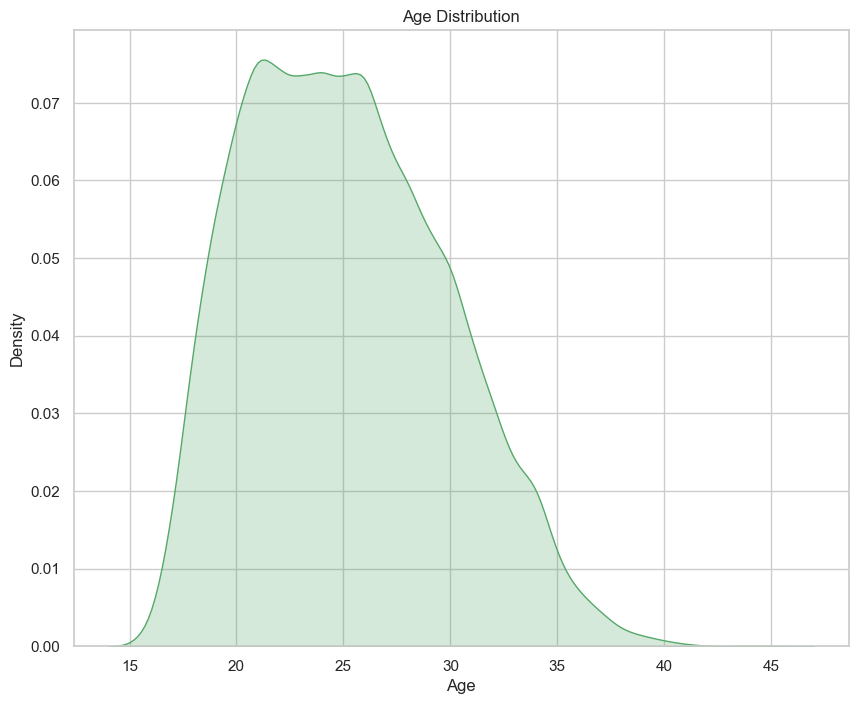

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
x = fifa['Age']
ax = sns.kdeplot(x,shade=True,color="g")
plt.title("Age Distribution")

plt.show()

### Histograms

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. 

- A `hist()` function already exists in matplotlib. 

- We can use Seaborn to plot a histogram.

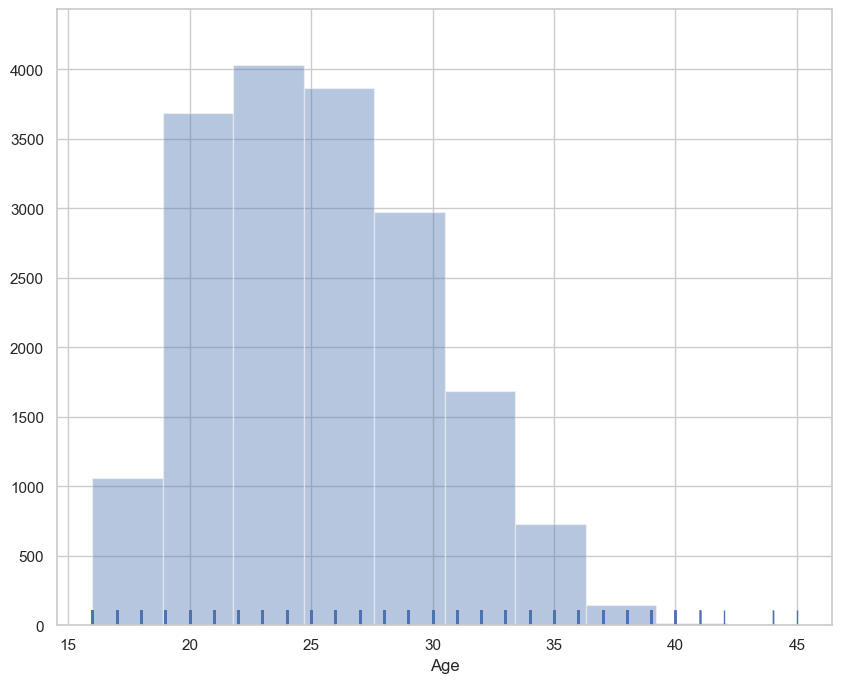

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
x = fifa['Age'] 
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

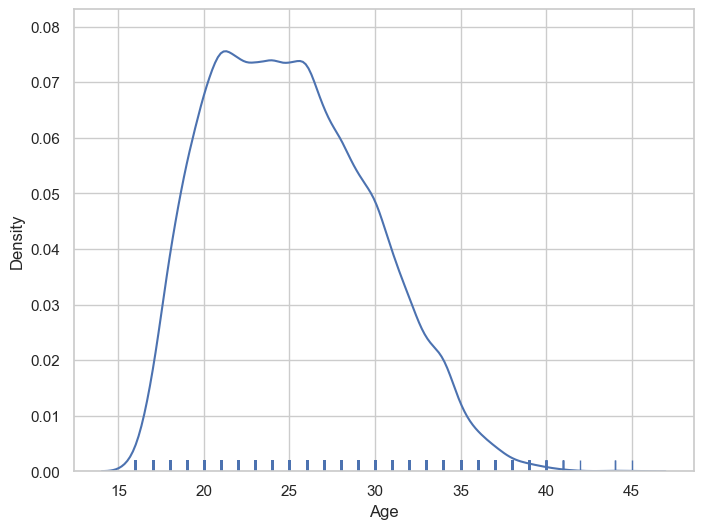

In [14]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax = sns.distplot(x, hist=False, rug=True, bins=10)
plt.show()

### Explore `Preferred Foot` variable

### Check number of unique values in `Preferred Foot` variabl

In [15]:
fifa["Preferred Foot"].nunique()

2

- We can see that there are two types of unique values in `Preferred Foot` variable.

### Check frequency distribution of values in `Preferred Foot` variable

In [16]:
fifa["Preferred Foot"].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

- The `Preferred Foot` variable contains two types of values - `Right` and `Left`.

### Visualize distribution of values with Seaborn `countplot()` function.

- A countplot shows the counts of observations in each categorical bin using bars.

- It can be thought of as a histogram across a categorical, instead of quantitative, variable.

- This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

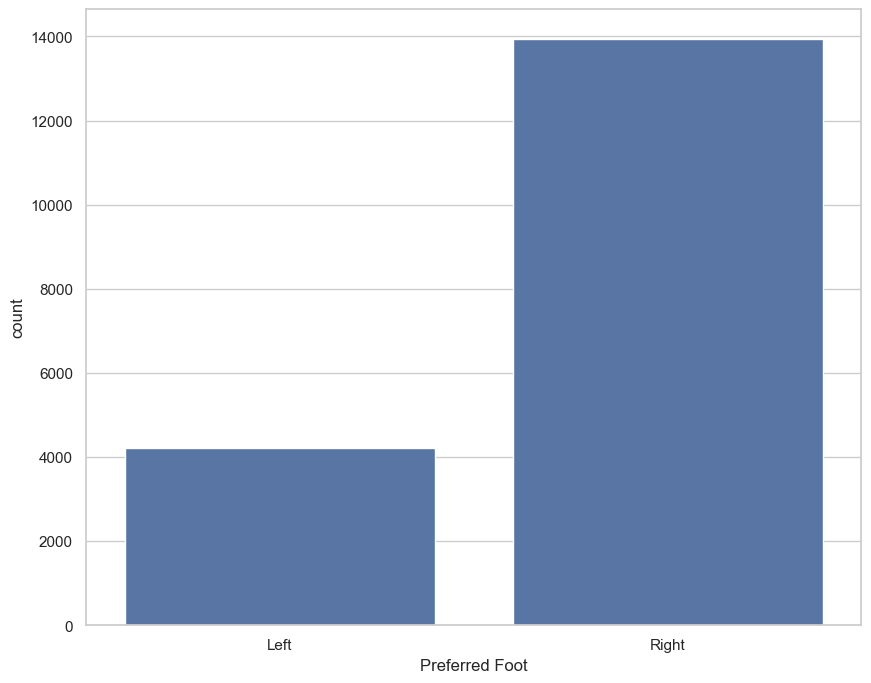

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="Preferred Foot", data=fifa)

plt.show()

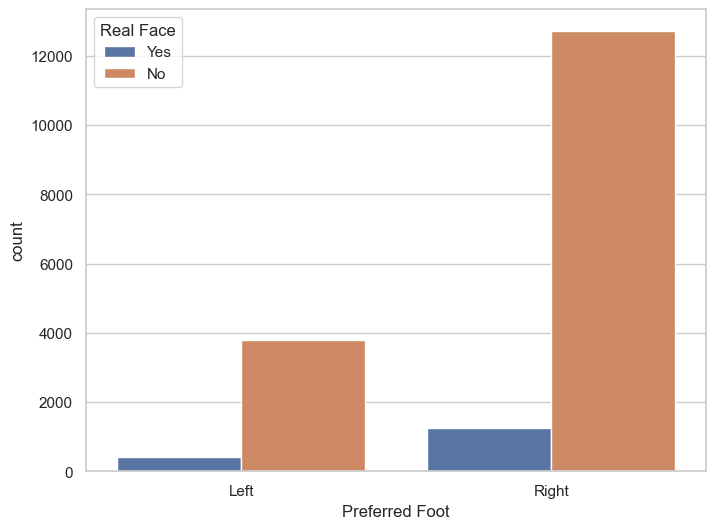

In [19]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifa)
plt.show()

We can draw plot vertically as shown below

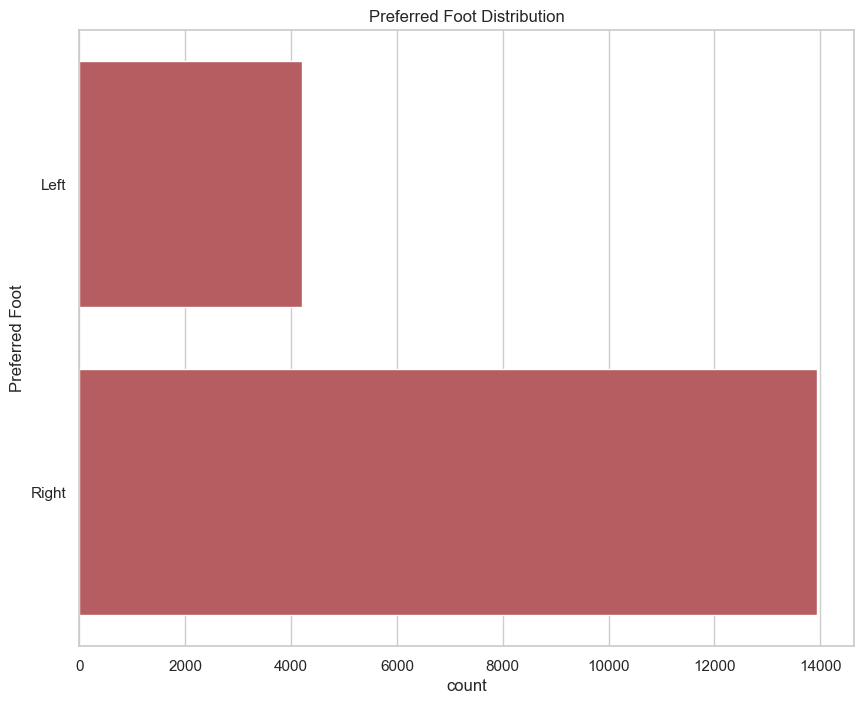

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
x = fifa["Preferred Foot"]
ax = sns.countplot(x,color="r")
plt.title("Preferred Foot Distribution")


plt.show()


### Seaborn `Catplot()` function

- We can use Seaborn `Catplot()` function to plot categorical scatterplots.

- The default representation of the data in `catplot()` uses a scatterplot. 

- It helps to draw figure-level interface for drawing categorical plots onto a facetGrid.

- This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. 

- The `kind` parameter selects the underlying axes-level function to use.

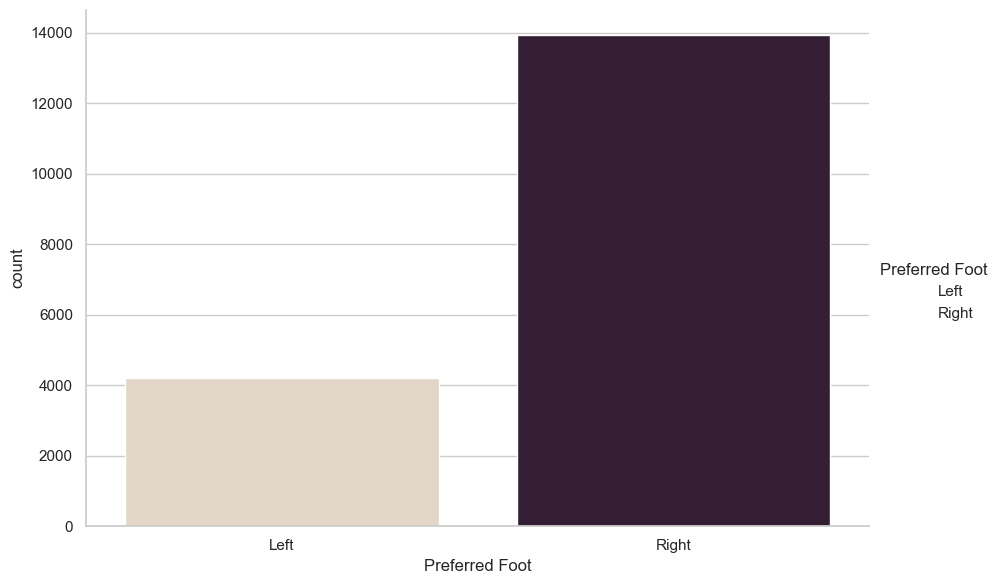

In [28]:
c = sns.catplot(x="Preferred Foot", data=fifa,kind="count",  palette="ch:.25",height=6,aspect=1.5)   

plt.show()

### Explore `International Reputation` variable

### Check the number of unique values in `International Reputation` variable

In [29]:
fifa["International Reputation"].nunique()

5

### Check the distribution of values in `International Reputation` variable

In [30]:
fifa["International Reputation"].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

### Seaborn `Stripplot()` function


- This function draws a scatterplot where one variable is categorical.

- A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where we want to show all observations along with some representation of the underlying distribution.

- I will plot a stripplot with `International Reputation` as categorical variable and `Potential` as the other variable.

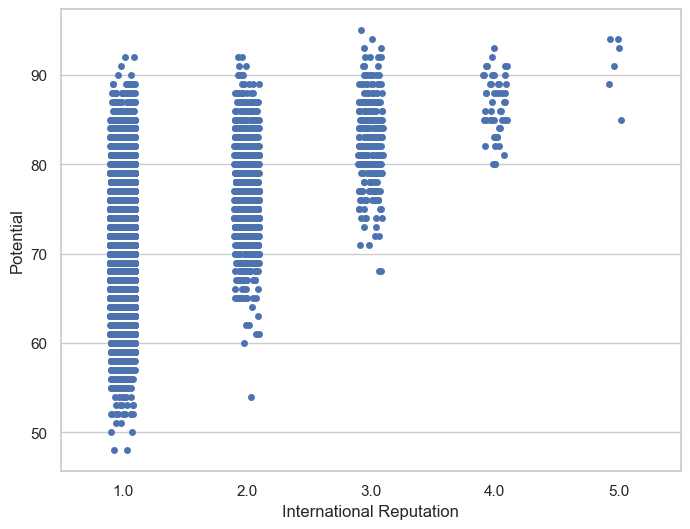

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

We can add jitter to bring out the distribution of value


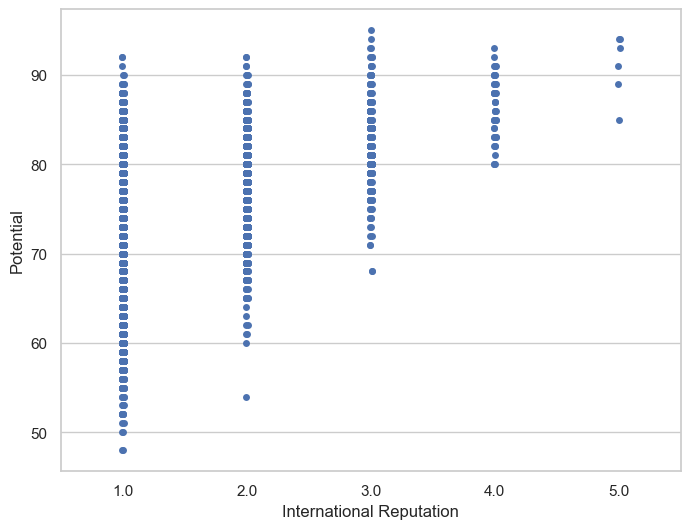

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa, jitter=0.01)
plt.show()

We can nest the strips within a second categorical variable - `Preferred Foot`

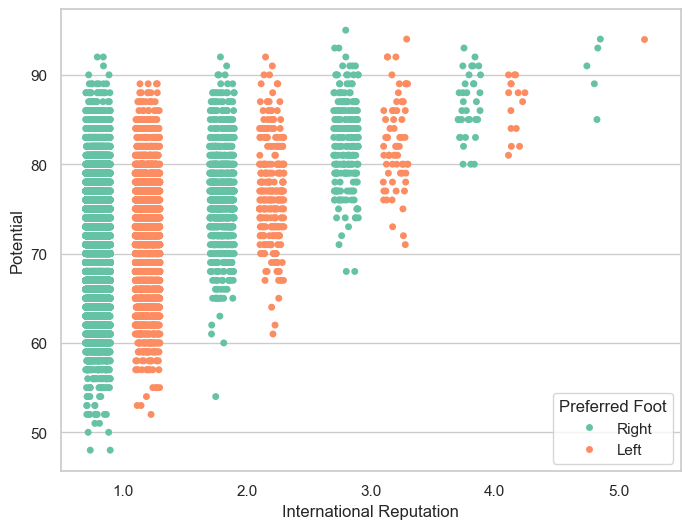

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential",hue="Preferred Foot", data=fifa, jitter=0.2,
              palette="Set2",dodge=True)
plt.show()

we can draw strip with large points and different asthetics 

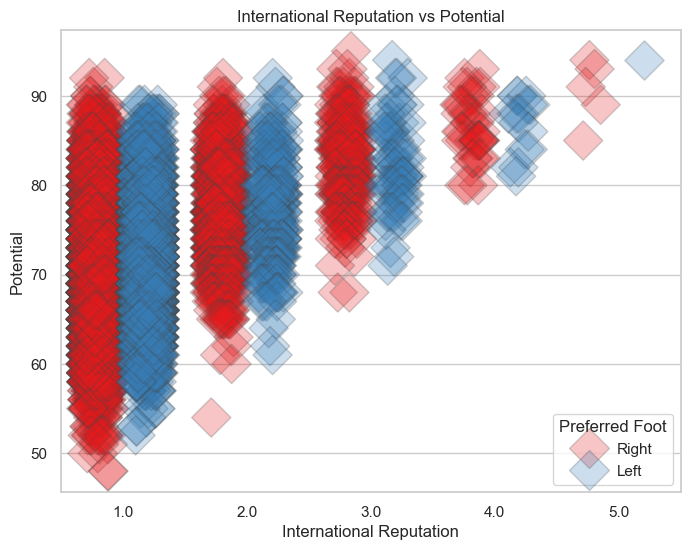

In [43]:
fig,ax = plt.subplots(figsize=(8,6))    
sns.stripplot(x="International Reputation", y="Potential",hue="Preferred Foot", data=fifa, jitter=0.2,
              palette="Set1",size=20,marker="D",dodge=True,edgecolor="gray",linewidth=1,alpha=0.25)
plt.title("International Reputation vs Potential")  
plt.show()

### Seaborn `boxplot()` function


- This function draws a box plot to show distributions with respect to categories.

- A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

- The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

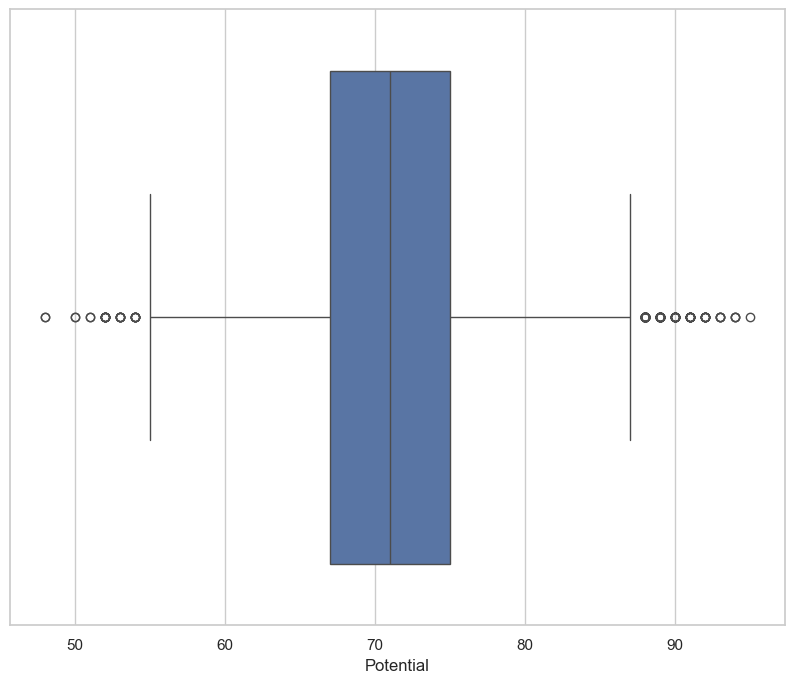

In [45]:
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=fifa["Potential"])

plt.show()

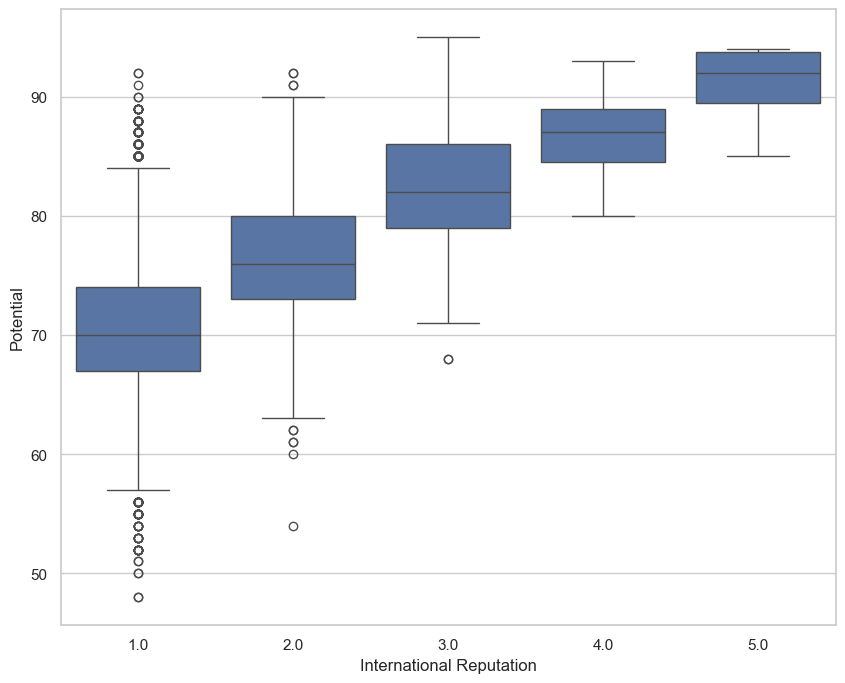

In [46]:
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="International Reputation", y="Potential", data=fifa)

plt.show()

We can draw a boxplot with nested grouping by two categorical variables -

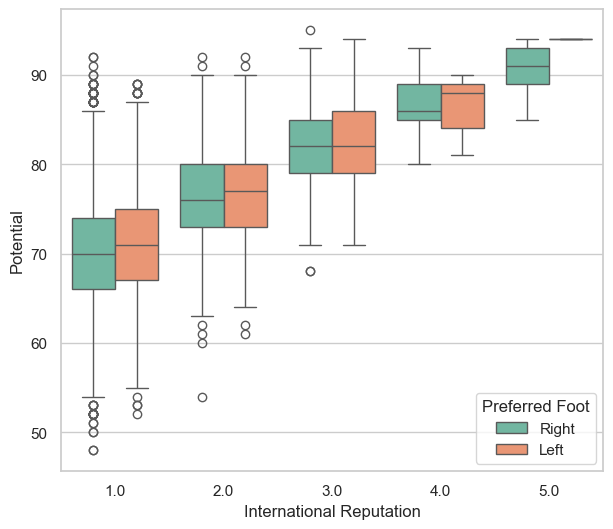

In [47]:
fig,ax = plt.subplots(figsize=(7,6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa, hue="Preferred Foot",palette="Set2")
plt.show()  

### Seaborn `violinplot()` function


- This function draws a combination of boxplot and kernel density estimate.

- A violin plot plays a similar role as a box and whisker plot. 

- It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. 

- Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.


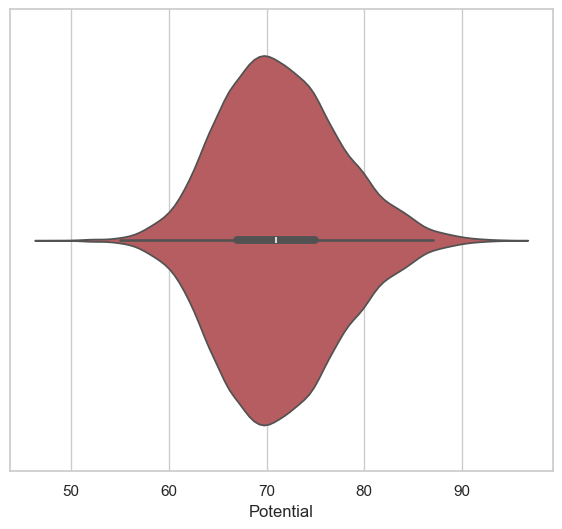

In [48]:
fig,ax =plt.subplots(figsize=(7,6))
sns.violinplot(x=fifa["Potential"],color="r")
plt.show()

We can draw the vertical violinplot grouped by the categorical variable `International Reputation

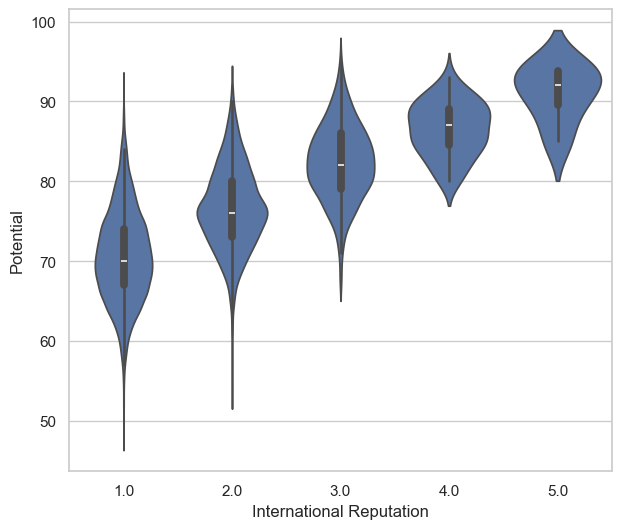

In [49]:
fig,ax =plt.subplots(figsize=(7,6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

We can draw a violinplot with nested grouping by two categorical variables as shown below

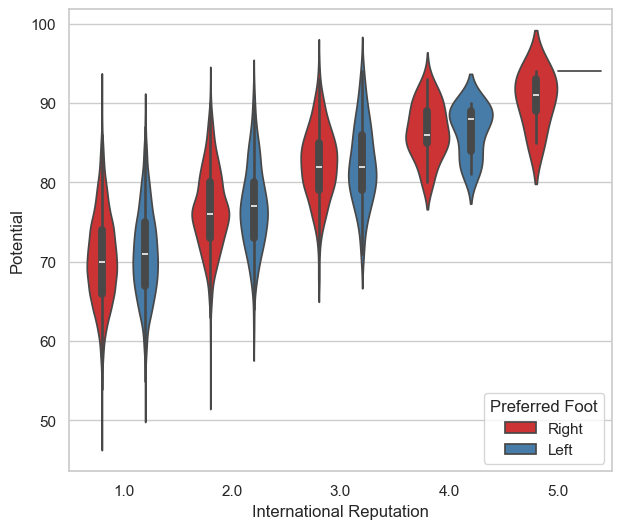

In [50]:
fig,ax =plt.subplots(figsize=(7,6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa,hue="Preferred Foot",palette="Set1")
plt.show()

- We can draw split violins to compare the across the hue variable as follows-

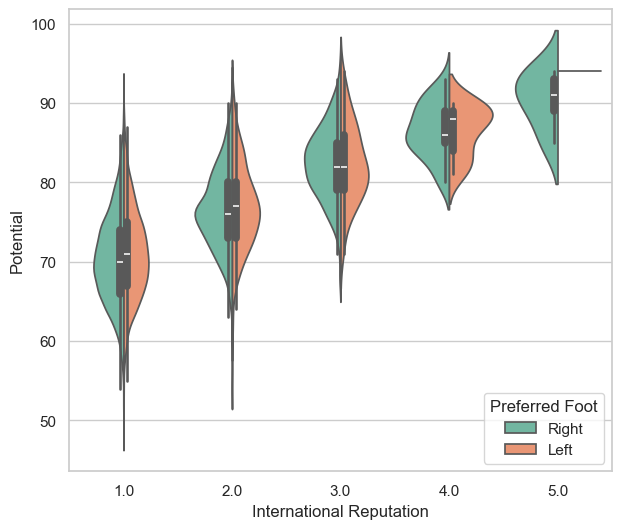

In [51]:
fig,ax =plt.subplots(figsize=(7,6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa,hue="Preferred Foot",palette="Set2",split=True)
plt.show()

### Seaborn `pointplot()` function


- This function show point estimates and confidence intervals using scatter plot glyphs.

- A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars

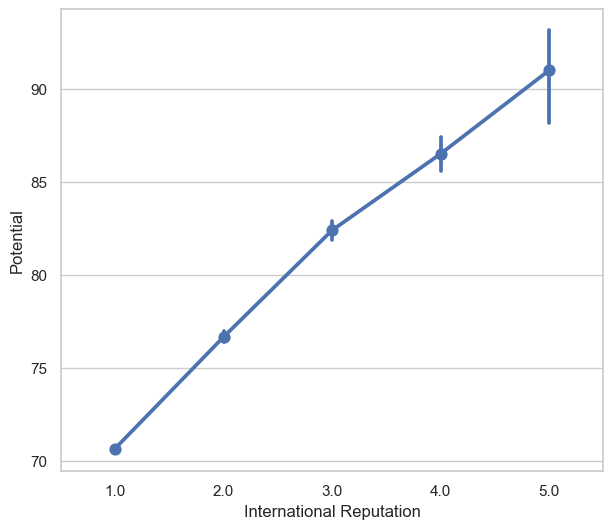

In [52]:
fig,ax =plt.subplots(figsize=(7,6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

- We can draw a set of vertical points with nested grouping by a two variables as follows-

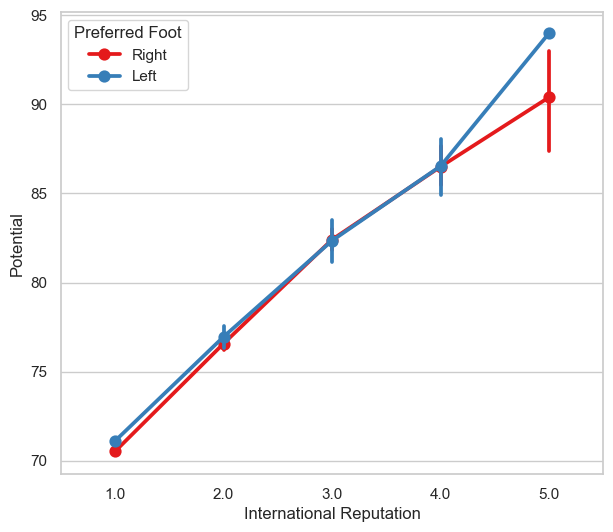

In [53]:
fig,ax =plt.subplots(figsize=(7,6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa,hue="Preferred Foot",palette="Set1")
plt.show()  

- We can separate the points for different hue levels along the categorical axis as follows-

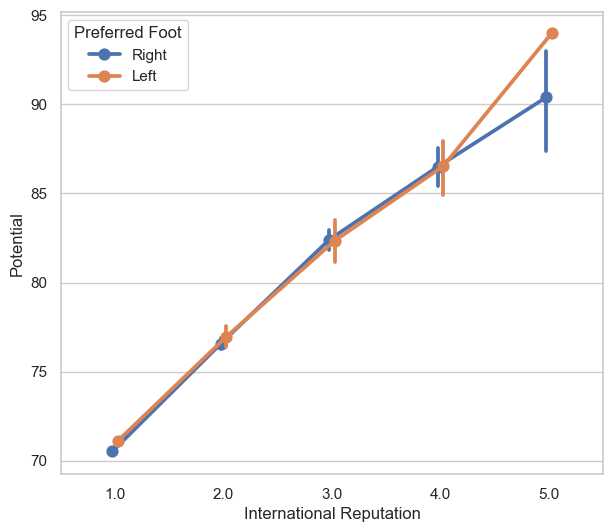

In [55]:
fig,ax =plt.subplots(figsize=(7,6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa,hue="Preferred Foot",dodge=True)

plt.show()  

- We can use a `Join = False` to not link the points in the graph if we need link we just skip writing this `Join = False`


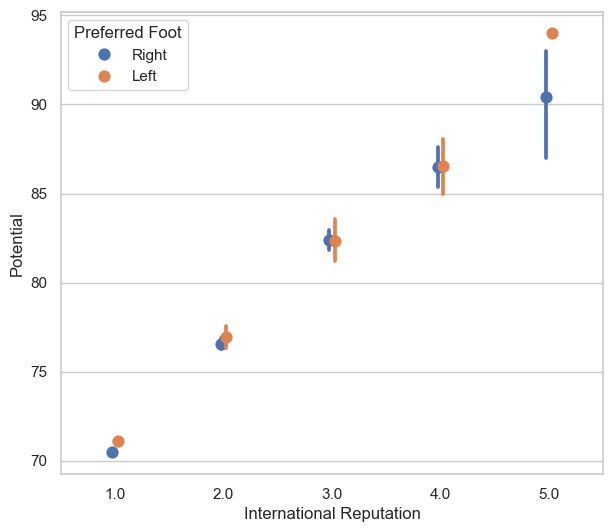

In [56]:
fig,ax =plt.subplots(figsize=(7,6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa,hue="Preferred Foot",dodge=True,join=False)
plt.show()

We can use a different marker and line style for the hue levels as follows-

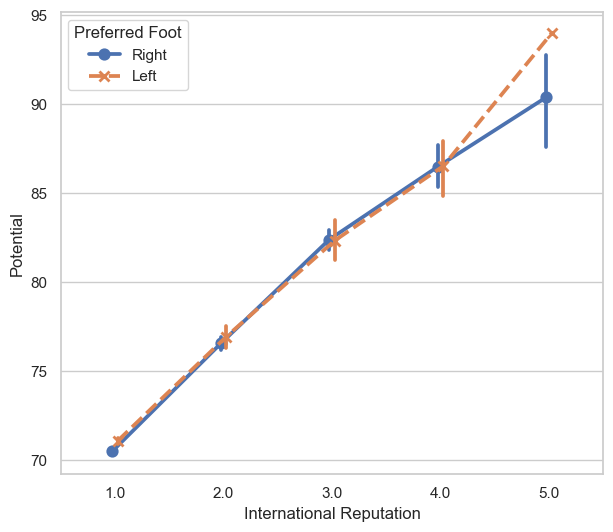

In [57]:
fig,ax =plt.subplots(figsize=(7,6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa,hue="Preferred Foot",dodge=True,join=False,markers=["o","x"],
              linestyles=["-","--"])
plt.show()

### Seaborn `barplot()` function


- This function show point estimates and confidence intervals as rectangular bars.

- A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. 

- Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.


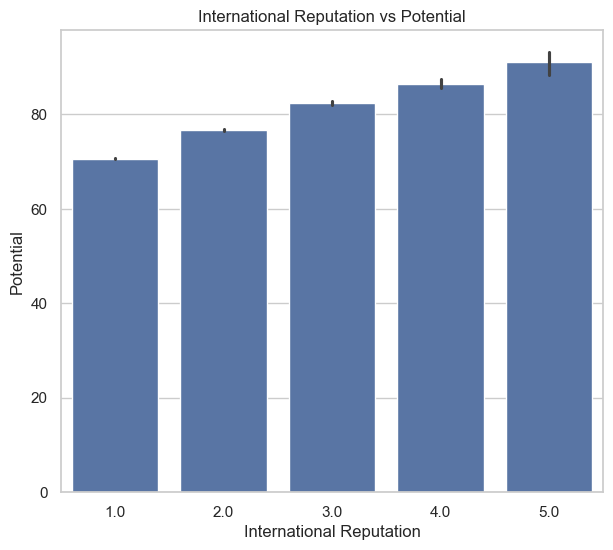

In [58]:
fig,ax =plt.subplots(figsize=(7,6))
sns.barplot(x="International Reputation", y="Potential", data=fifa)
plt.title("International Reputation vs Potential")
plt.show()  

- We can draw a set of vertical bars with nested grouping by a two variables as follows-

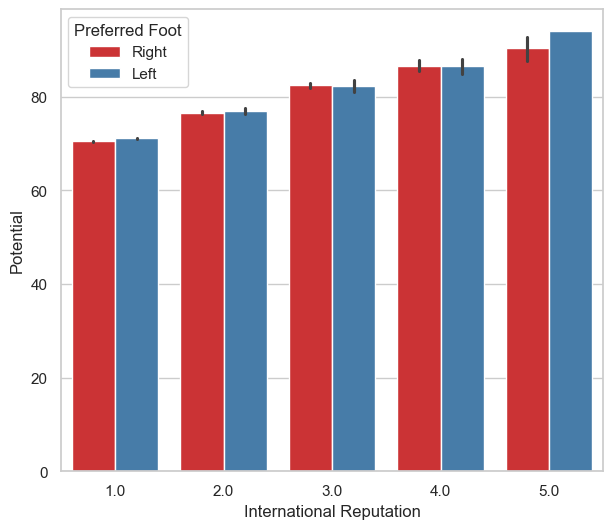

In [59]:
fig,ax = plt.subplots(figsize=(7,6))
sns.barplot(x="International Reputation", y="Potential", data=fifa,hue="Preferred Foot",palette="Set1")
plt.show()

We can use median as the estimate of central tendency as follows-

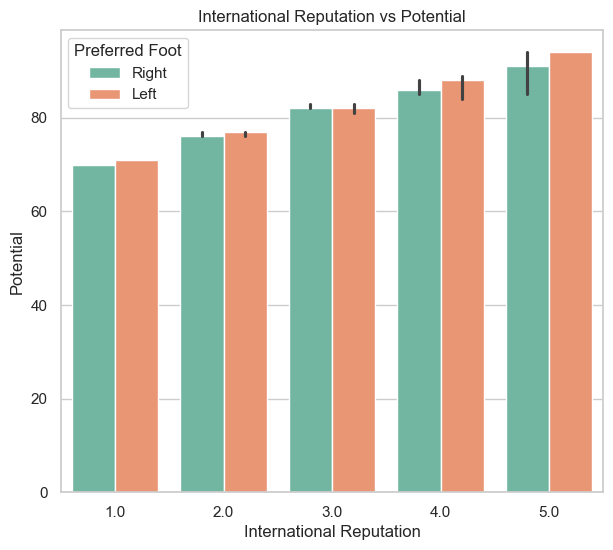

In [61]:
from numpy import median
fig,ax = plt.subplots(figsize=(7,6))
sns.barplot(x="International Reputation", y="Potential", data=fifa,hue="Preferred Foot",palette="Set2",estimator=median)    
plt.title("International Reputation vs Potential")  
plt.show()

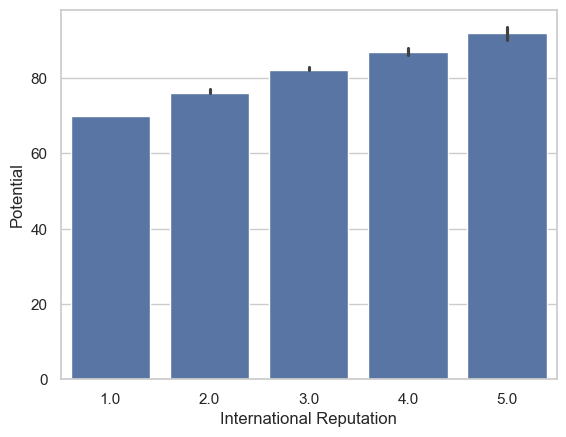

In [62]:
sns.barplot(x="International Reputation", y="Potential", data=fifa,estimator=median,ci=68)
plt.show()

We can show standard deviation of observations instead of a confidence interval as follows-

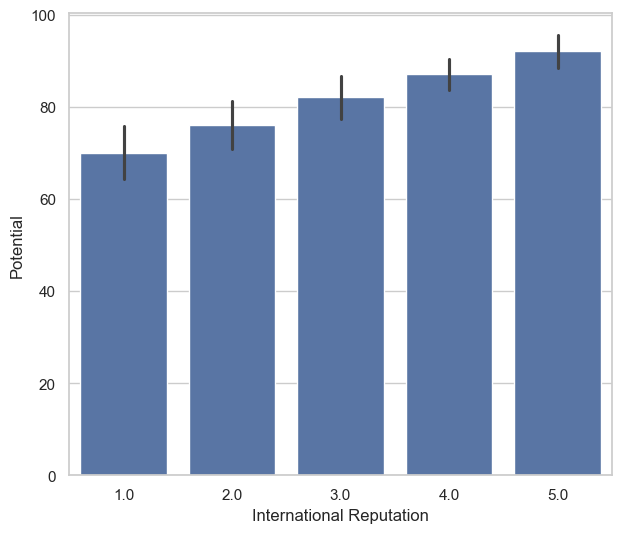

In [63]:
fig,ax = plt.subplots(figsize=(7,6))
sns.barplot(x="International Reputation", y="Potential", data=fifa,estimator=median,ci="sd")
plt.show()

We can add “caps” to the error bars as follows-

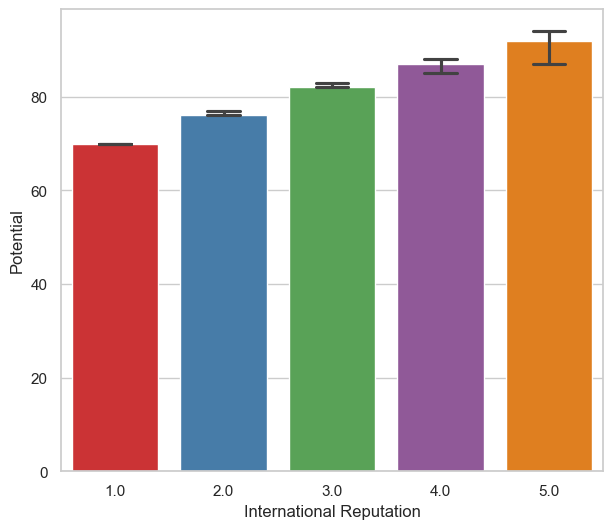

In [64]:
fig,ax = plt.subplots(figsize=(7,6))
sns.barplot(x="International Reputation", y="Potential", data=fifa,estimator=median,ci=95,capsize=0.3
            ,palette="Set1")    
plt.show()

### Visualizing statistical relationship with Seaborn `relplot()` function

### Seaborn `relplot()` function


- Seaborn `relplot()` function helps us to draw figure-level interface for drawing relational plots onto a FacetGrid.

- This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. 

- The `kind` parameter selects the underlying axes-level function to use-

- scatterplot() (with kind="scatter"; the default)

- lineplot() (with kind="line")

We can plot a scatterplot with variables `Heigh` and `Weight` with Seaborn `relplot()` function as follows-

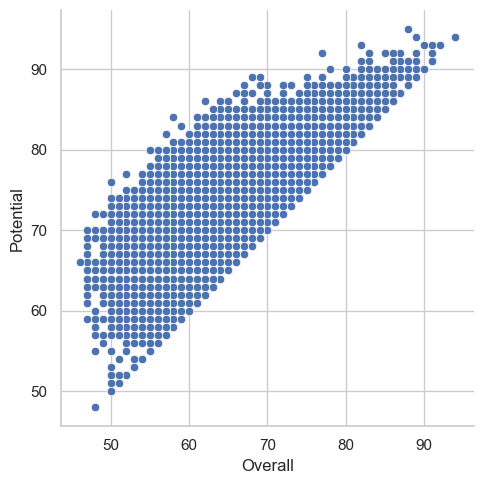

In [70]:

sns.relplot(x="Overall", y="Potential",data=fifa)
plt.show()

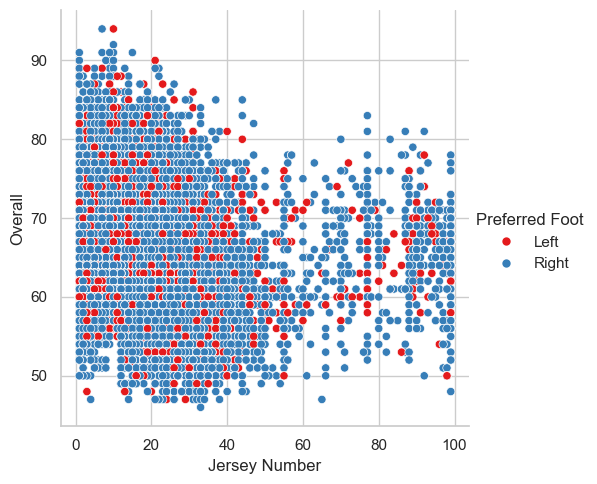

In [71]:
sns.relplot(x="Jersey Number", y="Overall",data=fifa,hue="Preferred Foot",palette="Set1")
plt.show()

### Seaborn `scatterplot()` function


- This function draws a scatter plot with possibility of several semantic groups.

- The relationship between x and y can be shown for different subsets of the data using the `hue`, `size` and `style` parameters. 

- These parameters control what visual semantics are used to identify the different subsets.

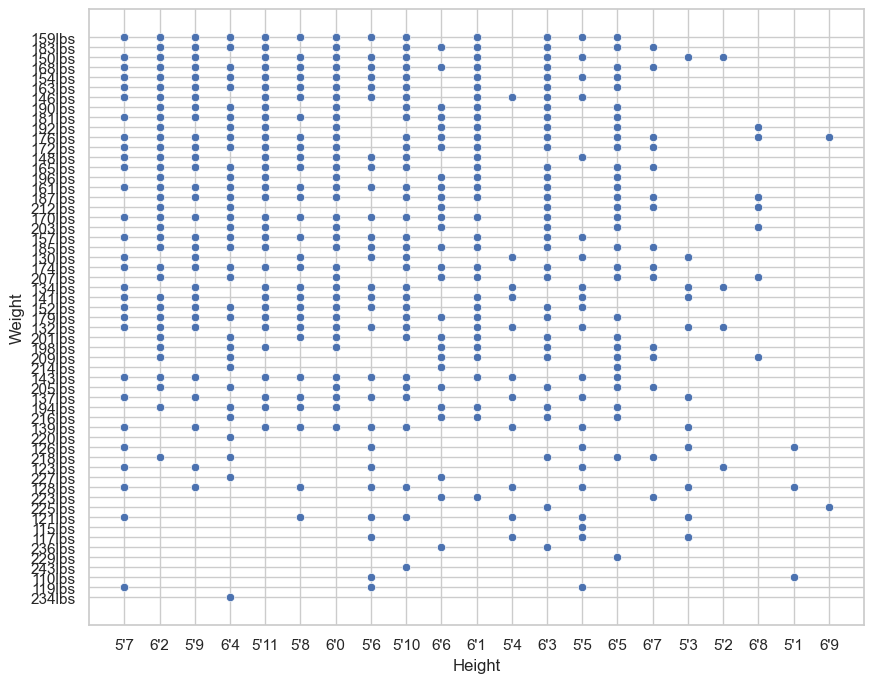

In [73]:
fig,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x="Height", y="Weight",data=fifa)
plt.show()

### Seaborn `lineplot()` function


- THis function draws a line plot with possibility of several semantic groupings.

- The relationship between x and y can be shown for different subsets of the data using the `hue`, `size` and `style` parameters. 

- These parameters control what visual semantics are used to identify the different subsets.

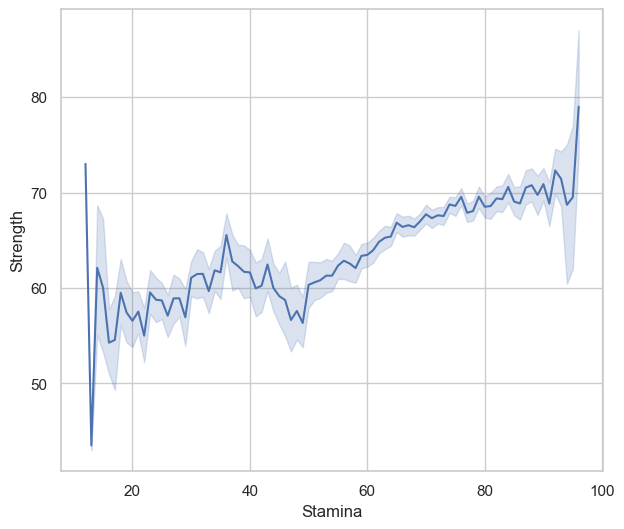

In [74]:
fig,ax = plt.subplots(figsize=(7,6))
sns.lineplot(x="Stamina",y="Strength",data=fifa)
plt.show()

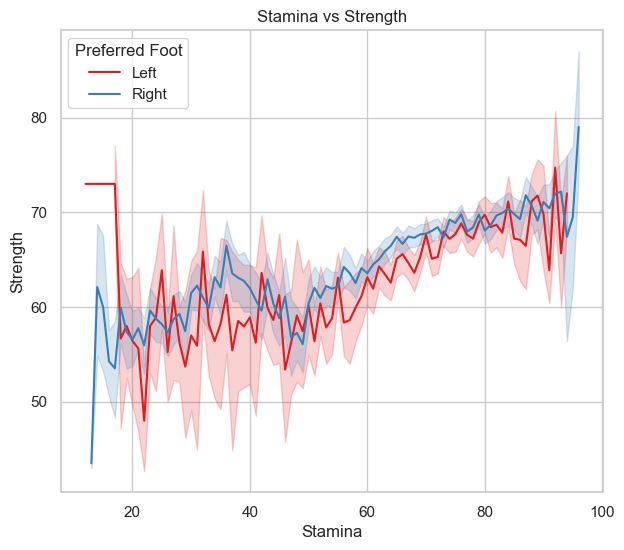

In [75]:
fig,ax = plt.subplots(figsize=(7,6))
sns.lineplot(x="Stamina",y="Strength",data=fifa,hue="Preferred Foot",palette="Set1")    
plt.title("Stamina vs Strength")
plt.show()

### Visualize linear relationship with Seaborn `regplot()` function

### Seaborn `regplot()` function

- This function plots data and a linear regression model fit.

- We can plot a linear regression model between `Overall` and `Potential` variable with `regplot()` function as follows-

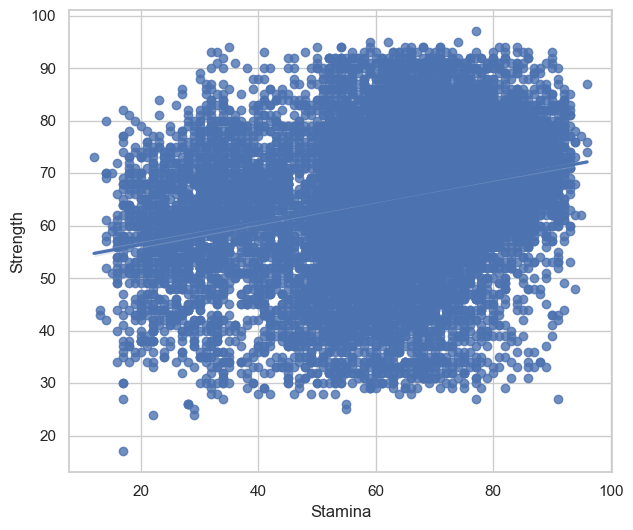

In [76]:
fig,ax = plt.subplots(figsize=(7,6))
sns.regplot(x="Stamina",y="Strength",data=fifa)
plt.show()


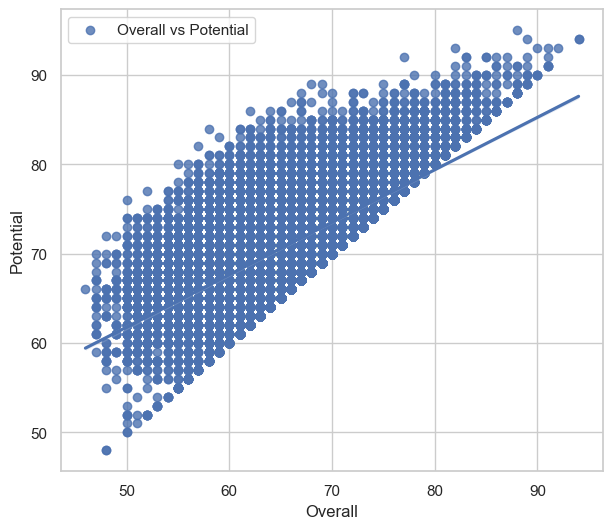

In [77]:
fig,ax = plt.subplots(figsize=(7,6))
sns.regplot(x="Overall",y="Potential",data=fifa)
plt.legend(["Overall vs Potential"])
plt.show()

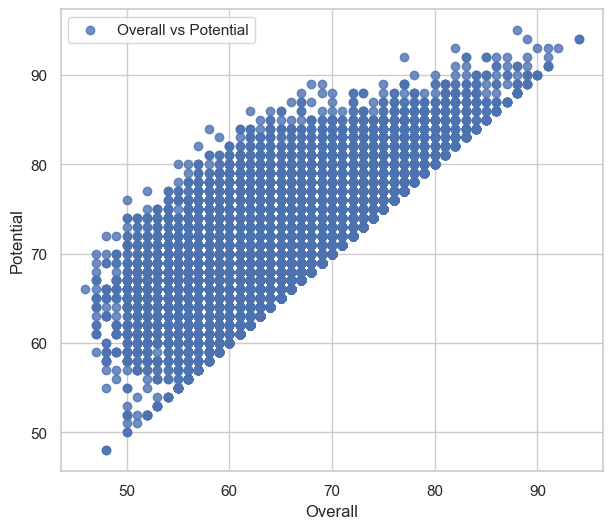

In [78]:
fig,ax = plt.subplots(figsize=(7,6))
sns.regplot(x="Overall",y="Potential",data=fifa,fit_reg=False)
plt.legend(["Overall vs Potential"])
plt.show()

We can use a different color and marker as follows-

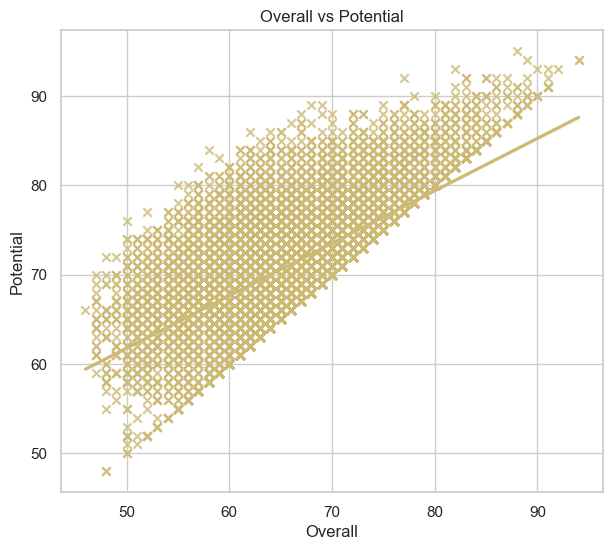

In [80]:
fig,ax = plt.subplots(figsize=(7,6))
sns.regplot(x="Overall",y="Potential",data=fifa,color="y",marker="x")
plt.title("Overall vs Potential")
plt.show()

We can plot with a discrete variable and add some jitter as follows-

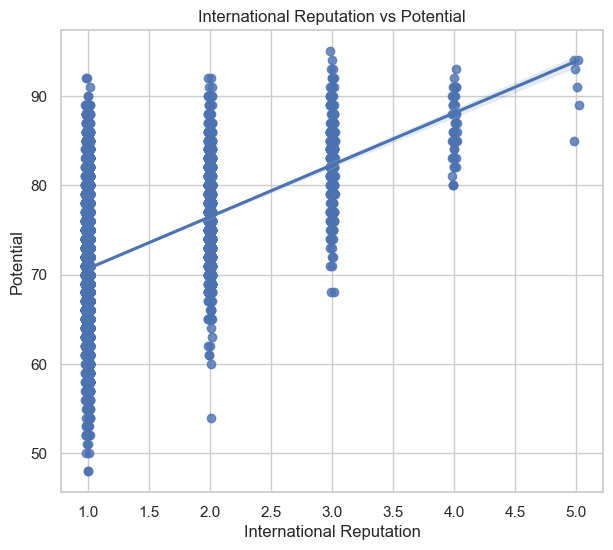

In [82]:
fig,ax = plt.subplots(figsize=(7,6))
sns.regplot(x="International Reputation",y="Potential",data=fifa,x_jitter=0.02)
plt.title("International Reputation vs Potential")  
plt.show()

### Seaborn `lmplot()` function


- This function plots data and regression model fits across a FacetGrid.

- This function combines `regplot()` and `FacetGrid`. 

- It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

- We can plot a linear regression model between `Overall` and `Potential` variable with `lmplot()` function as follows-

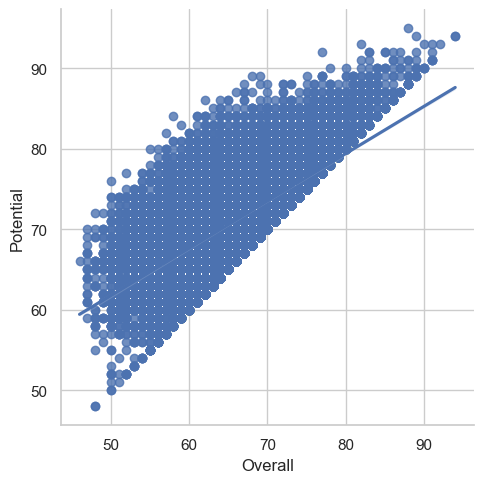

In [86]:

sns.lmplot(x="Overall",y="Potential",data=fifa)
plt.show()

We can use a different color palette as follows-

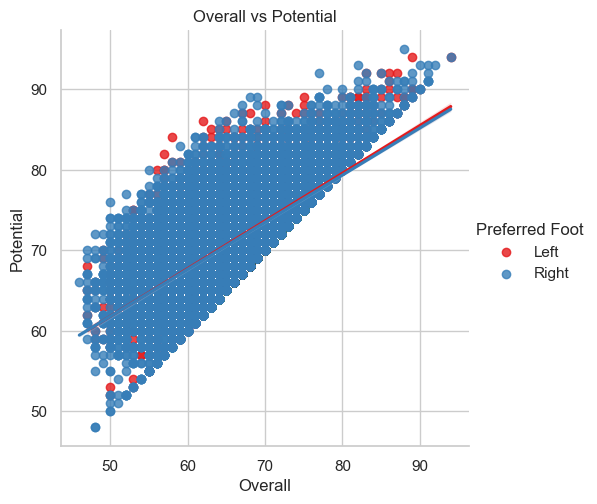

In [84]:
sns.lmplot(x="Overall",y="Potential",data=fifa,hue="Preferred Foot",palette="Set1")
plt.title("Overall vs Potential")   
plt.show()

We can condition on a third variable and plot the levels in different colors as follows-

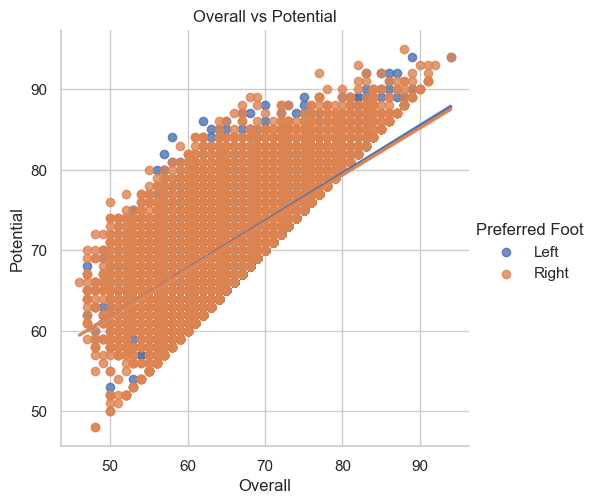

In [85]:
sns.lmplot(x="Overall",y="Potential",data=fifa,hue="Preferred Foot")
plt.title("Overall vs Potential")       
plt.show()

We can plot the levels of the third variable across different columns as follows-

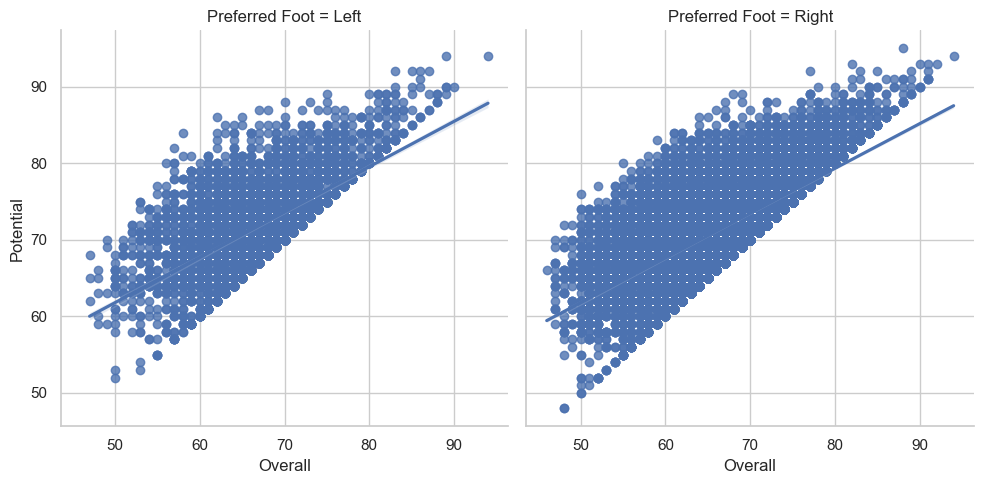

In [88]:
sns.lmplot(x="Overall",y="Potential",data=fifa,col="Preferred Foot")

plt.show()  

### MULTI PLOT GRIDS

### Seaborn `FacetGrid()` function

- The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. 

- A FacetGrid can be drawn with up to three dimensions - `row`, `col` and `hue`. The first two have obvious correspondence with the resulting array of axes - the `hue` variable is a third dimension along a depth axis, where different levels are plotted with different colors.

- The class is used by initializing a FacetGrid object with a dataframe and the names of the variables that will form the `row`, `column` or `hue` dimensions of the grid. 

- These variables should be categorical or discrete, and then the data at each level of the variable will be used for a facet along that axis.


We can initialize a 1x2 grid of facets using the fifa19 dataset.

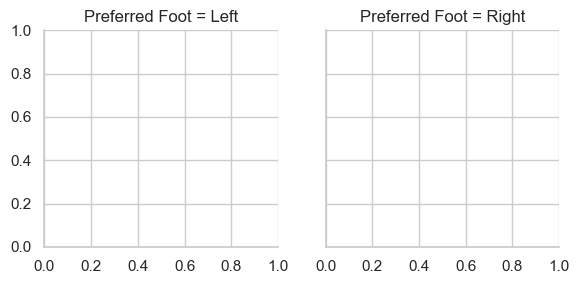

In [95]:
f = sns.FacetGrid(fifa,col="Preferred Foot")

plt.show()

We can draw a univariate plot of `Overall` variable on each facet as follows-

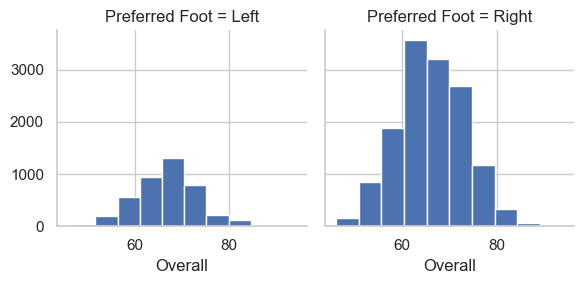

In [91]:
f = sns.FacetGrid(fifa,col="Preferred Foot")
f = f.map(plt.hist,"Overall")
plt.show()

We can draw a univariate plot of `Potential` variable on each facet as follows-

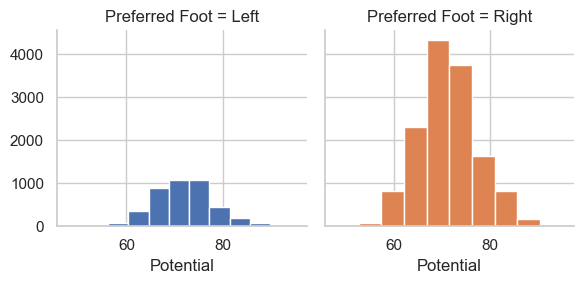

In [92]:
f = sns.FacetGrid(fifa,col="Preferred Foot",hue="Preferred Foot")
f = f.map(plt.hist,"Potential")
plt.show()

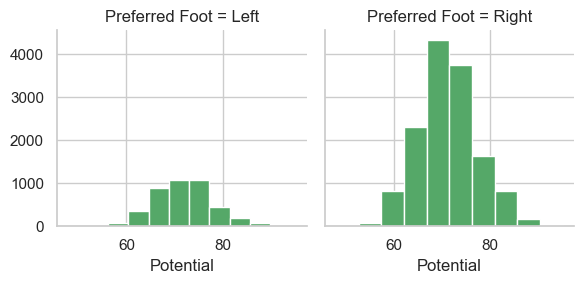

In [96]:
f = sns.FacetGrid(fifa,col="Preferred Foot",hue="Preferred Foot")
f = f.map(plt.hist,"Potential",bins=10,color="g")
plt.show()

- We Can plot a bivariate function on each facet as follows :-

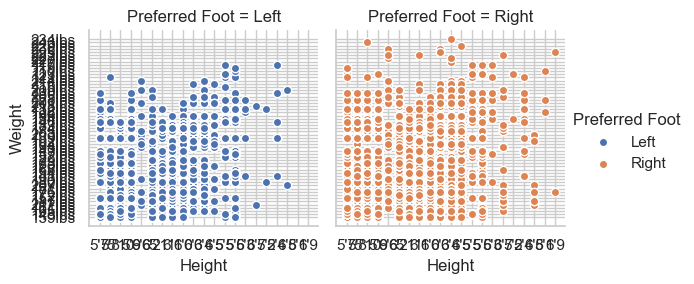

In [98]:
f = sns.FacetGrid(fifa,col="Preferred Foot",hue="Preferred Foot")
f = (f.map(plt.scatter,"Height","Weight",edgecolor = "w").add_legend())

plt.show()

The size of the figure is set by providing the height of each facet, along with the aspect ratio:

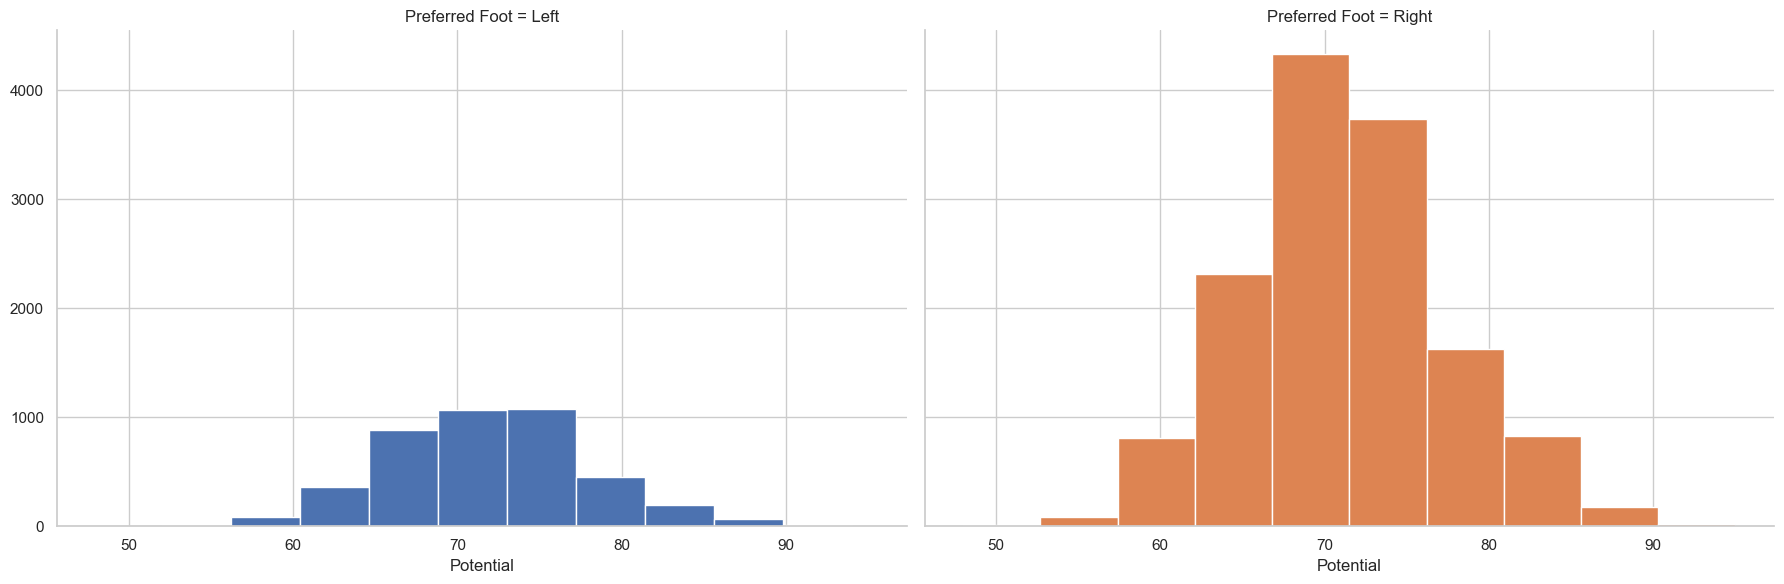

In [101]:
f = sns.FacetGrid(fifa,col="Preferred Foot",hue="Preferred Foot",height=6,aspect=1.5)
f = f.map(plt.hist,"Potential")
plt.show()

### Seaborn `Pairgrid()` function


- This function plots subplot grid for plotting pairwise relationships in a dataset.

- This class maps each variable in a dataset onto a column and row in a grid of multiple axes. 

- Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

- It can also represent an additional level of conditionalization with the hue parameter, which plots different subets of data in different colors. 

- This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

In [102]:
fifa_new = fifa[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

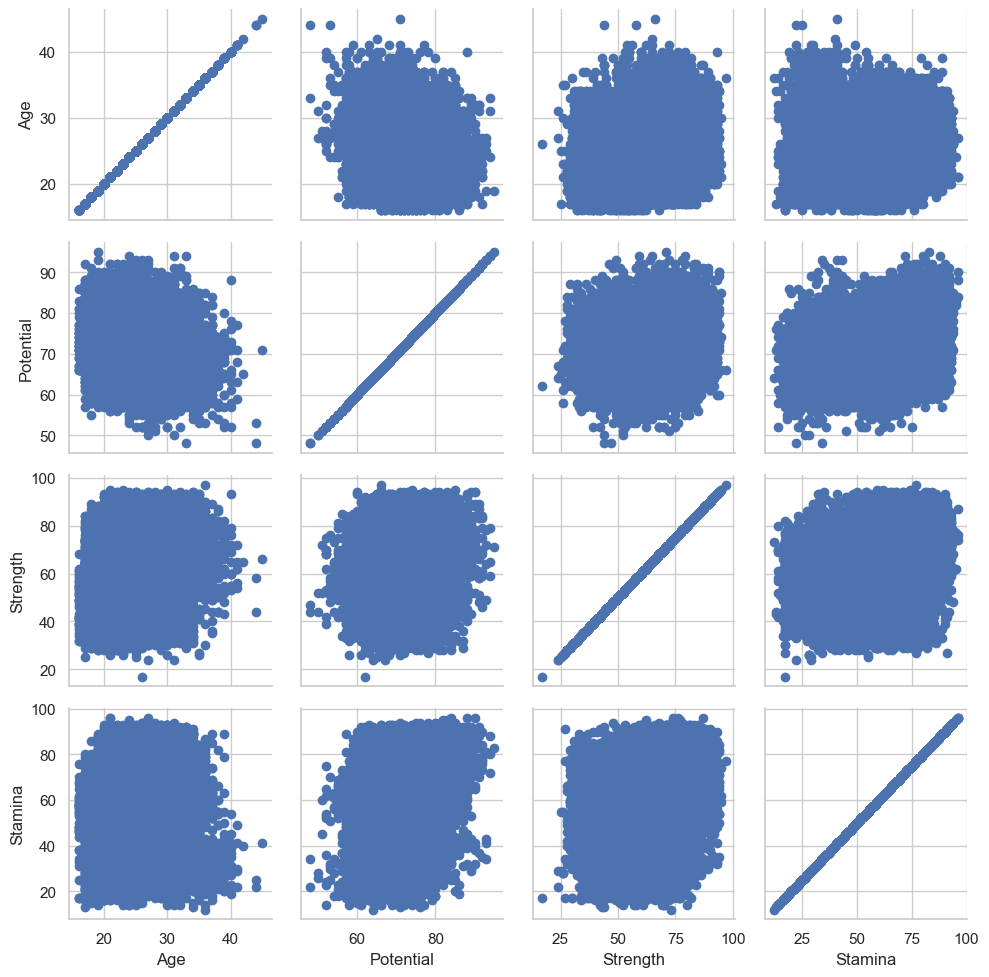

In [107]:

p = sns.PairGrid(fifa_new)
p = p.map(plt.scatter)


plt.show()

We can show a univariate distribution on the diagonal as follows-

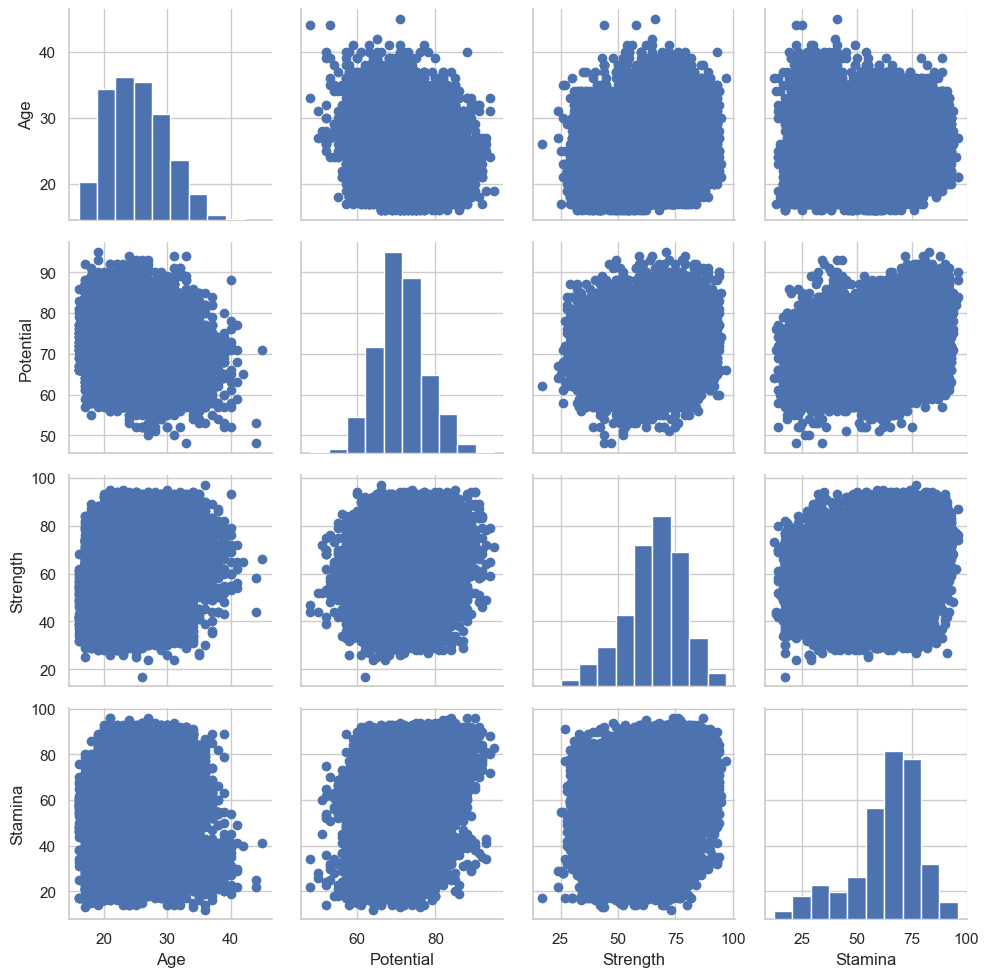

In [110]:
p = sns.PairGrid(fifa_new)
p = p.map_diag(plt.hist)
p = p.map_offdiag(plt.scatter)


plt.show()  

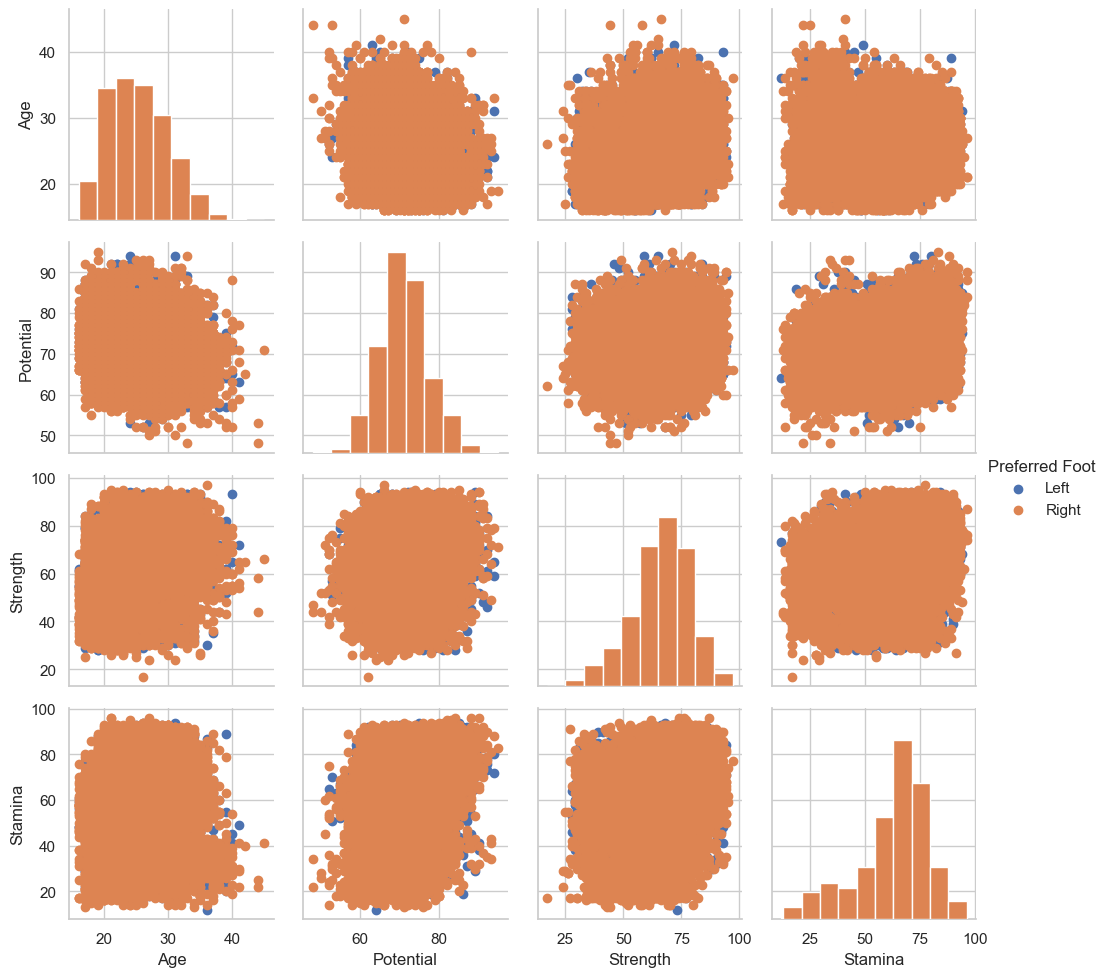

In [111]:
p = sns.PairGrid(fifa_new,hue="Preferred Foot")
p = p.map_diag(plt.hist)
p = p.map_offdiag(plt.scatter)
p = p.add_legend()
plt.show()

We can use a different style to show multiple histograms as follows-

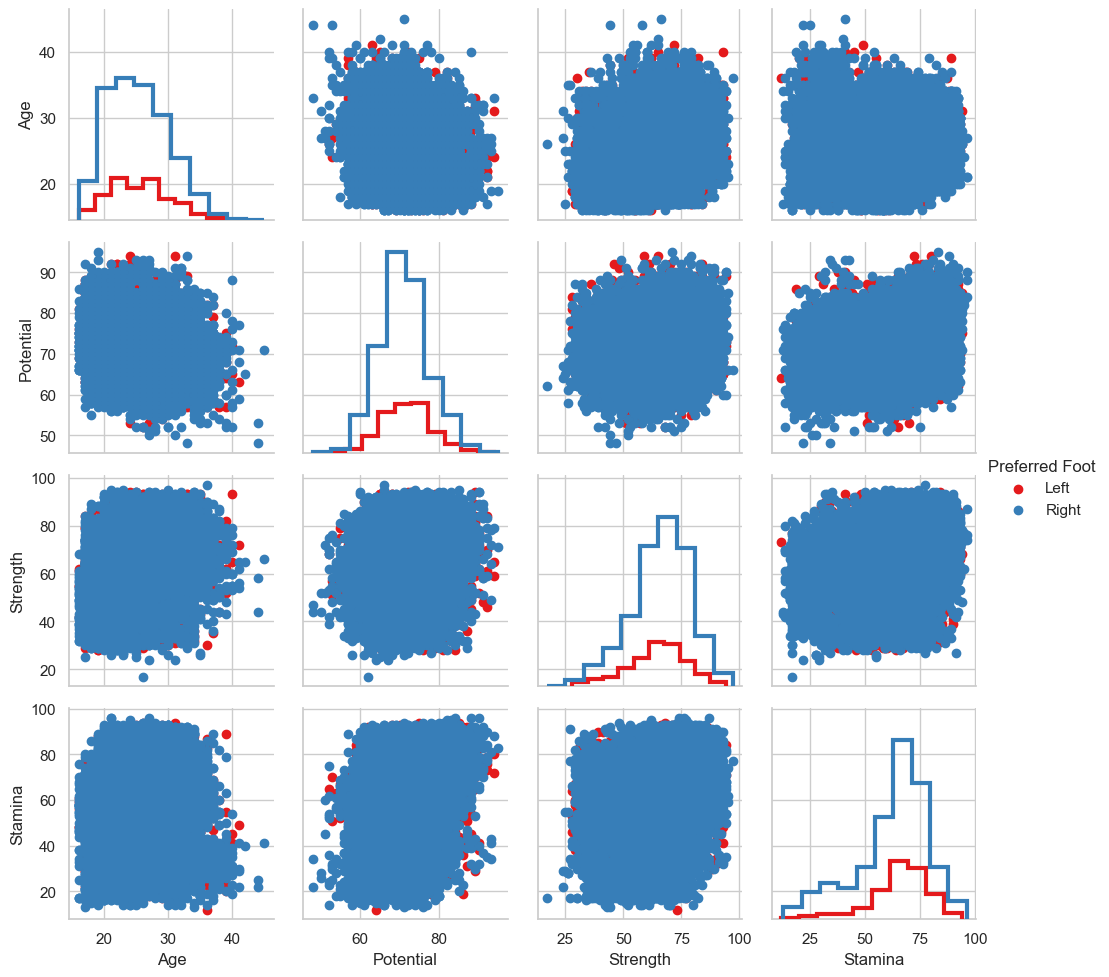

In [112]:
p = sns.PairGrid(fifa_new,hue="Preferred Foot",palette="Set1")  
p = p.map_diag(plt.hist,histtype="step",linewidth=3)
p = p.map_offdiag(plt.scatter)      
p = p.add_legend()
plt.show()


We can plot a subset of variables as follows-

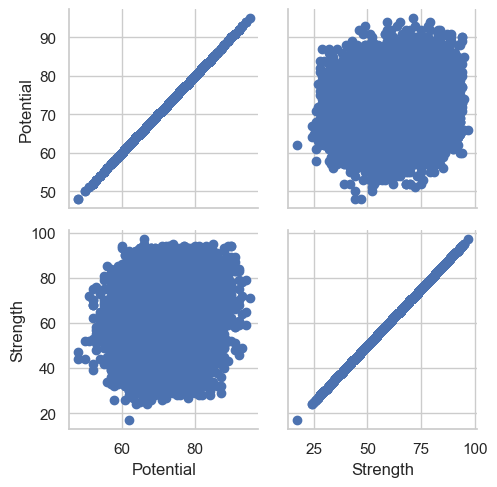

In [115]:
p = sns.PairGrid(fifa_new,vars=["Potential","Strength"])
p = p.map(plt.scatter)

plt.show()

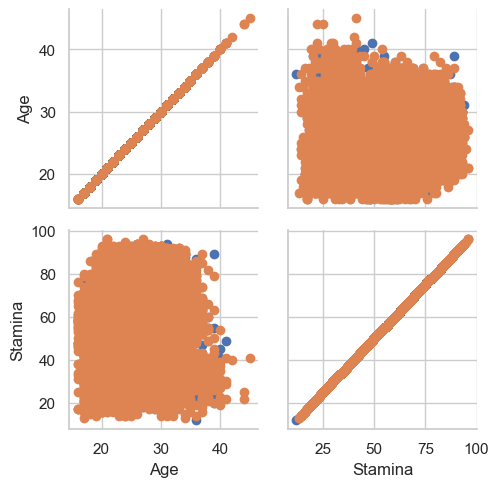

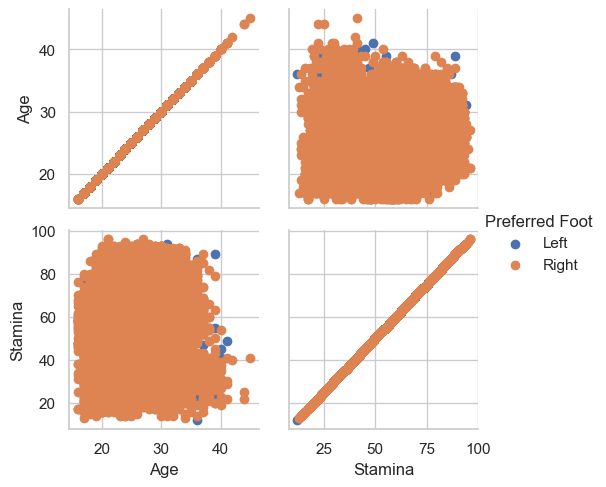

In [117]:
p = sns.PairGrid(fifa_new,vars=["Age","Stamina"],hue="Preferred Foot")
p = p.map(plt.scatter)
p = p.add_legend()
plt.show()

We can use different functions on the upper and lower triangles as follows-

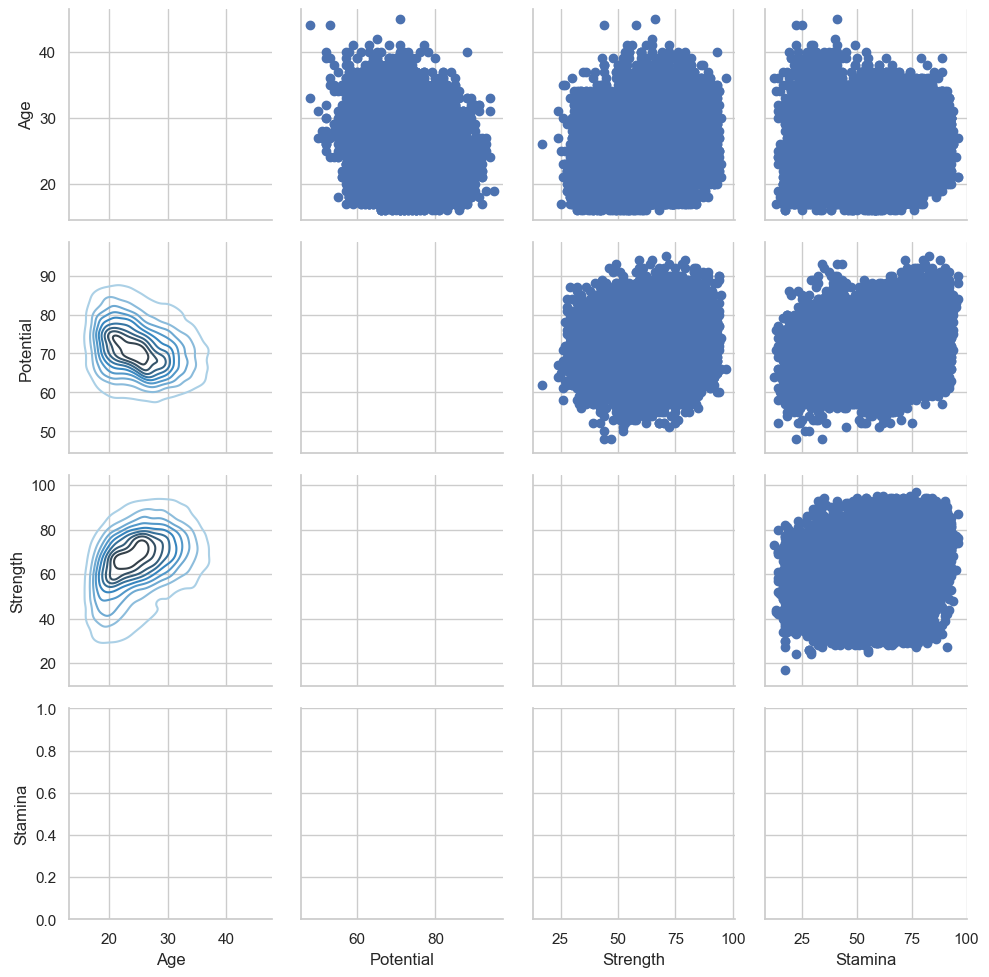

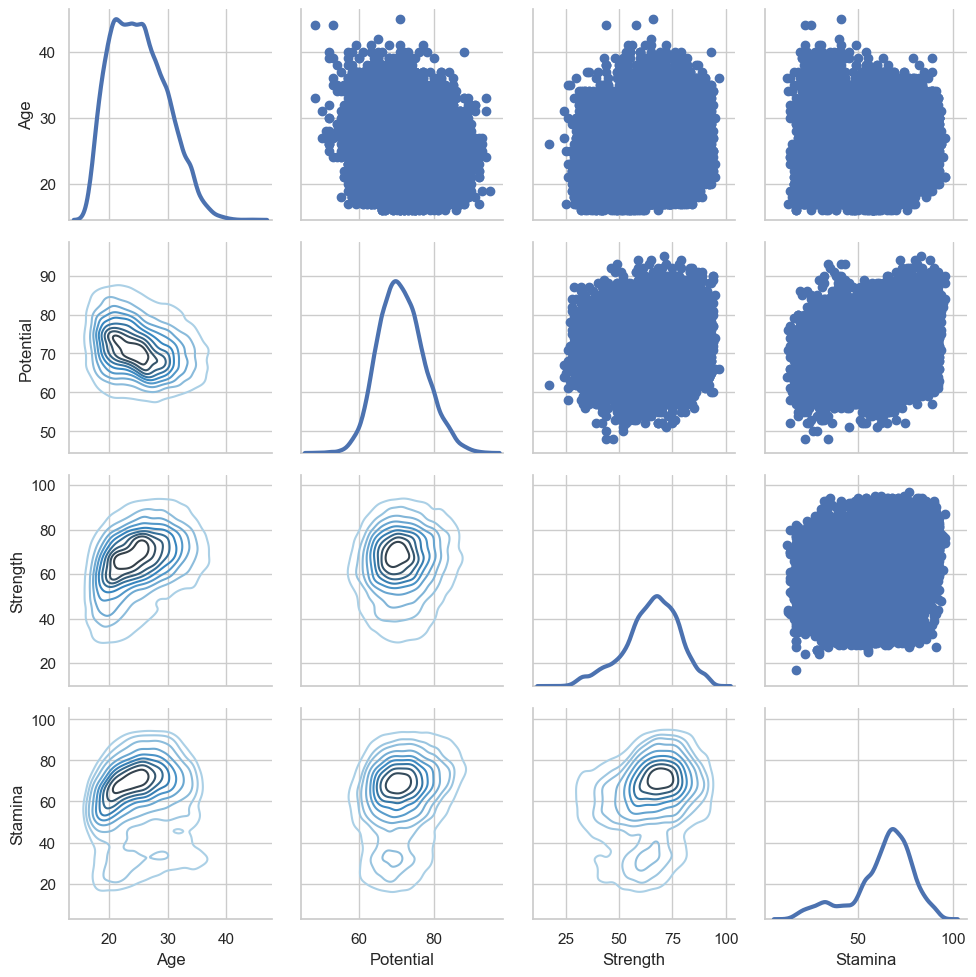

In [119]:
p = sns.PairGrid(fifa_new)
p = p.map_upper(plt.scatter)
p = p.map_lower(sns.kdeplot, cmap="Blues_d")
p = p.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

### Seaborn `Jointgrid()` function


- This function provides a grid for drawing a bivariate plot with marginal univariate plots.

- It set up the grid of subplots.

We can initialize the figure and add plots using default parameters as follows-

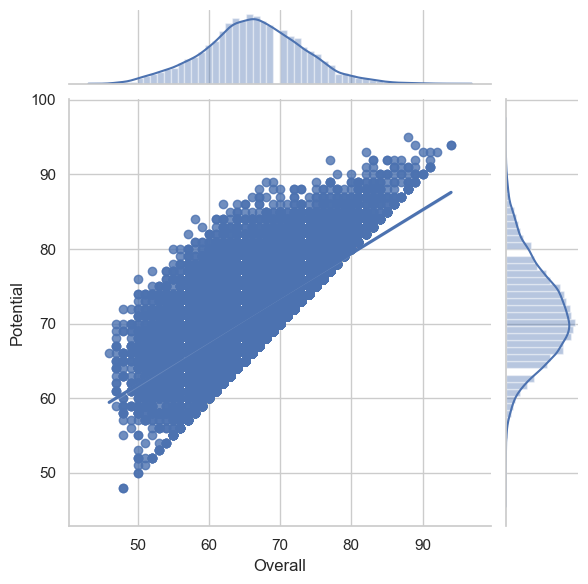

In [120]:
j = sns.JointGrid(x="Overall", y="Potential", data=fifa)
j = j.plot(sns.regplot, sns.distplot)
plt.show()

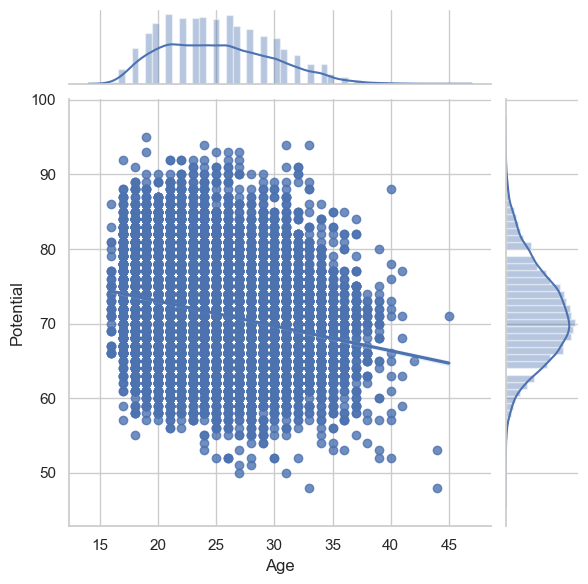

In [121]:
j = sns.JointGrid(x="Age", y="Potential", data=fifa)
j = j.plot(sns.regplot, sns.distplot)
plt.show()

We can draw the join and marginal plots separately, which allows finer-level control other parameters as follows -

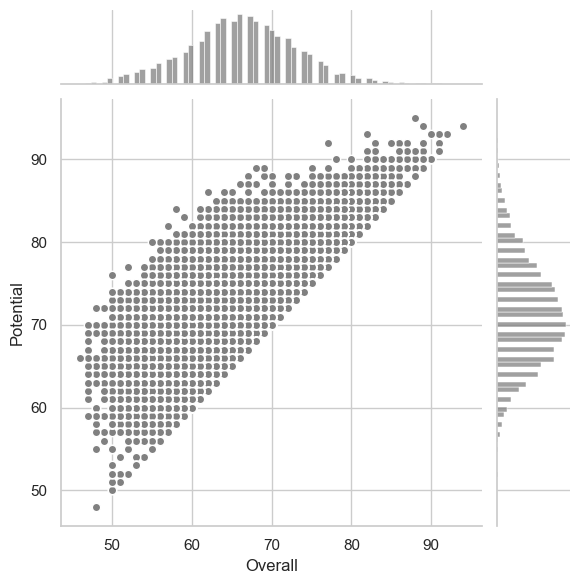

In [124]:
j = sns.JointGrid(x="Overall", y="Potential", data=fifa)
j = j.plot_joint(plt.scatter, color=".5", edgecolor="w")
j = j.plot_marginals(sns.histplot, kde=False, color=".5")
plt.show()

We can remove the space between the joint and marginal axes as follows -

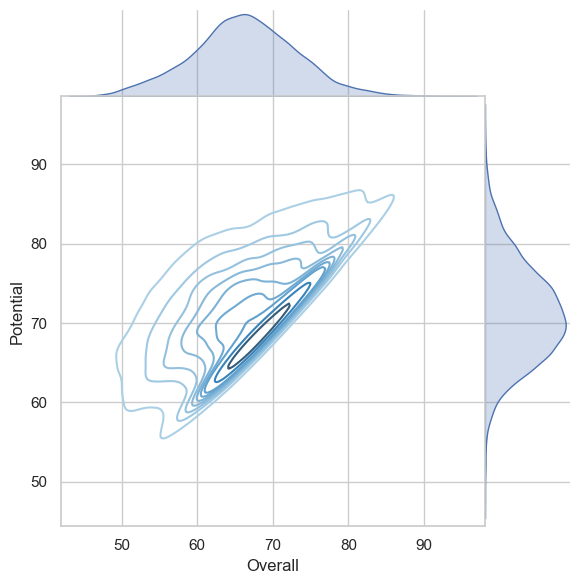

In [126]:
j = sns.JointGrid(x="Overall", y="Potential", data=fifa, space=0)
j = j.plot_joint(sns.kdeplot, cmap="Blues_d")
j = j.plot_marginals(sns.kdeplot, shade=True)
plt.show()

We can draw a smaller plot with relatively larger marginal axes as follows -

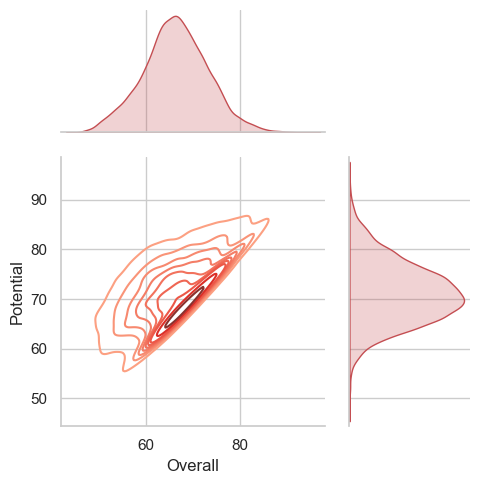

In [127]:
j = sns.JointGrid(x="Overall", y="Potential", data=fifa, height=5, ratio=2)
j = j.plot_joint(sns.kdeplot, cmap="Reds_d")
j = j.plot_marginals(sns.kdeplot, color="r", shade=True)
plt.show()  

### Controlling the size and shape of the plot


- The default plots made by `regplot()` and `lmplot()` look the same but on axes that have a different size and shape. 

- This is because `regplot()` is an “axes-level” function draws onto a specific axes. 

- This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. 

- If no axes object is explicitly provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. 

- To control the size, we need to create a figure object ourself as follows-

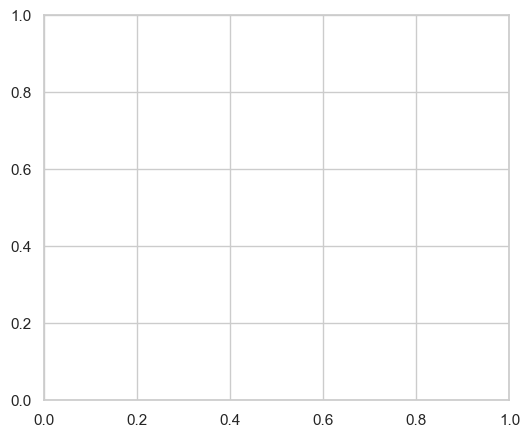

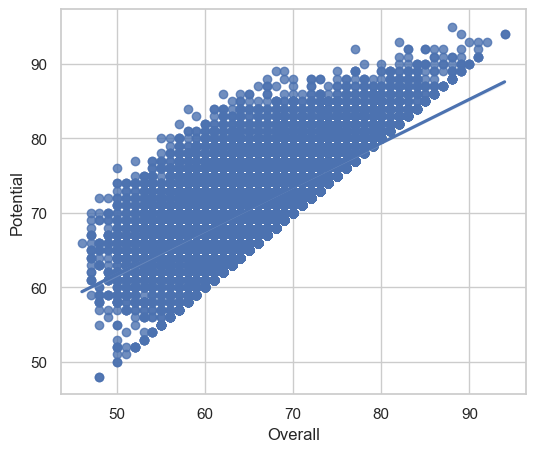

In [129]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.regplot(x="Overall", y="Potential", data=fifa)
plt.show()

In contrast, the size and shape of the `lmplot()` figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself.

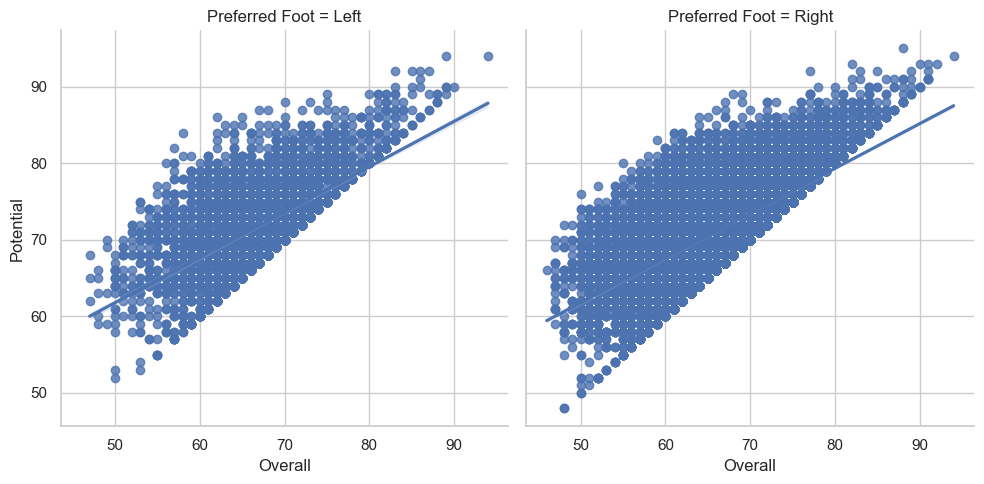

In [131]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa, col_wrap=2, height=5, aspect=1)
plt.show()

### Seaborn figure styles


- There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white` and `ticks`. 

- They are each suited to different applications and personal preferences. 

- The default theme is darkgrid. 

- The grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. 

- The whitegrid theme is similar, but it is better suited to plots with heavy data elements:



In [134]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

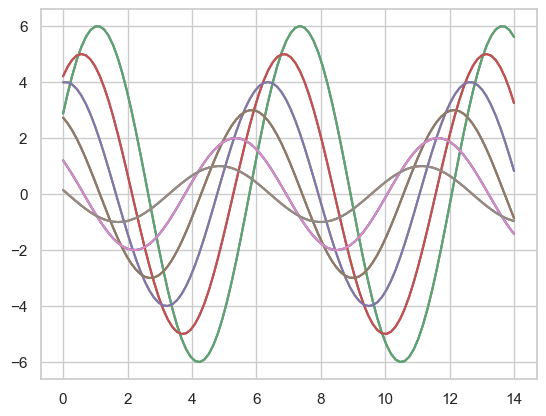

In [136]:
sinplot()
plt.show()

To switch to seaborn defaults, we need to call the `set()` function as follows -

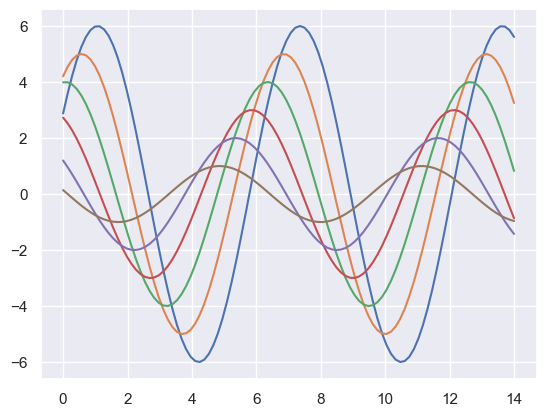

In [137]:
sns.set()
sinplot()
plt.show()

- We can SET different styles using `set_style`

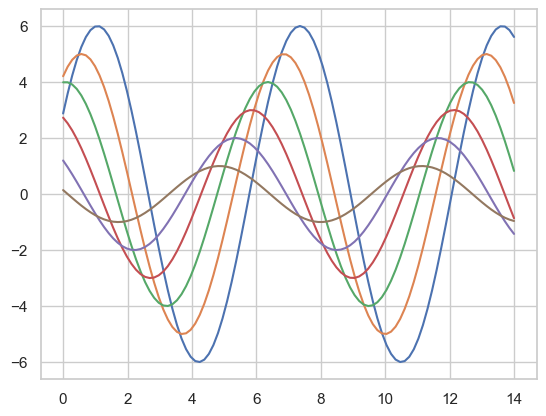

In [138]:
sns.set_style("whitegrid")
sinplot()
plt.show()

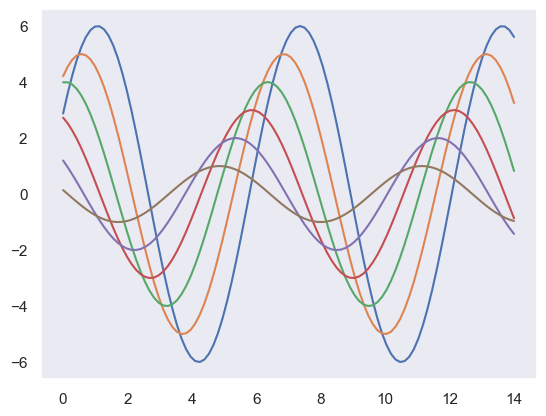

In [139]:
sns.set_style("dark")
sinplot()
plt.show()

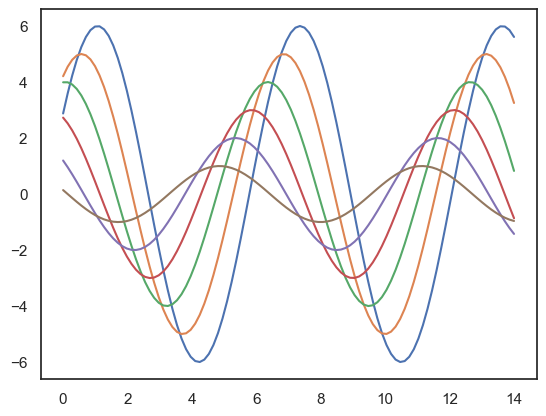

In [140]:
sns.set_style("white")
sinplot()
plt.show()

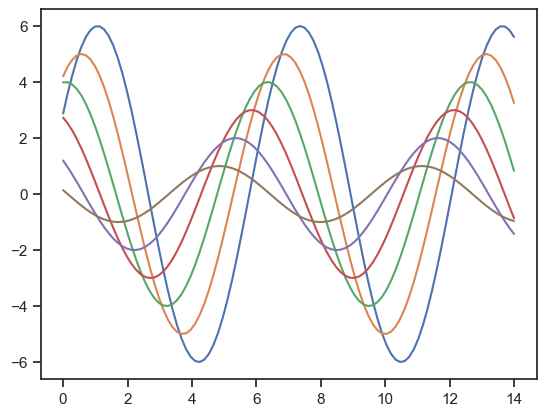

In [141]:
sns.set_style("ticks")
sinplot()
plt.show()

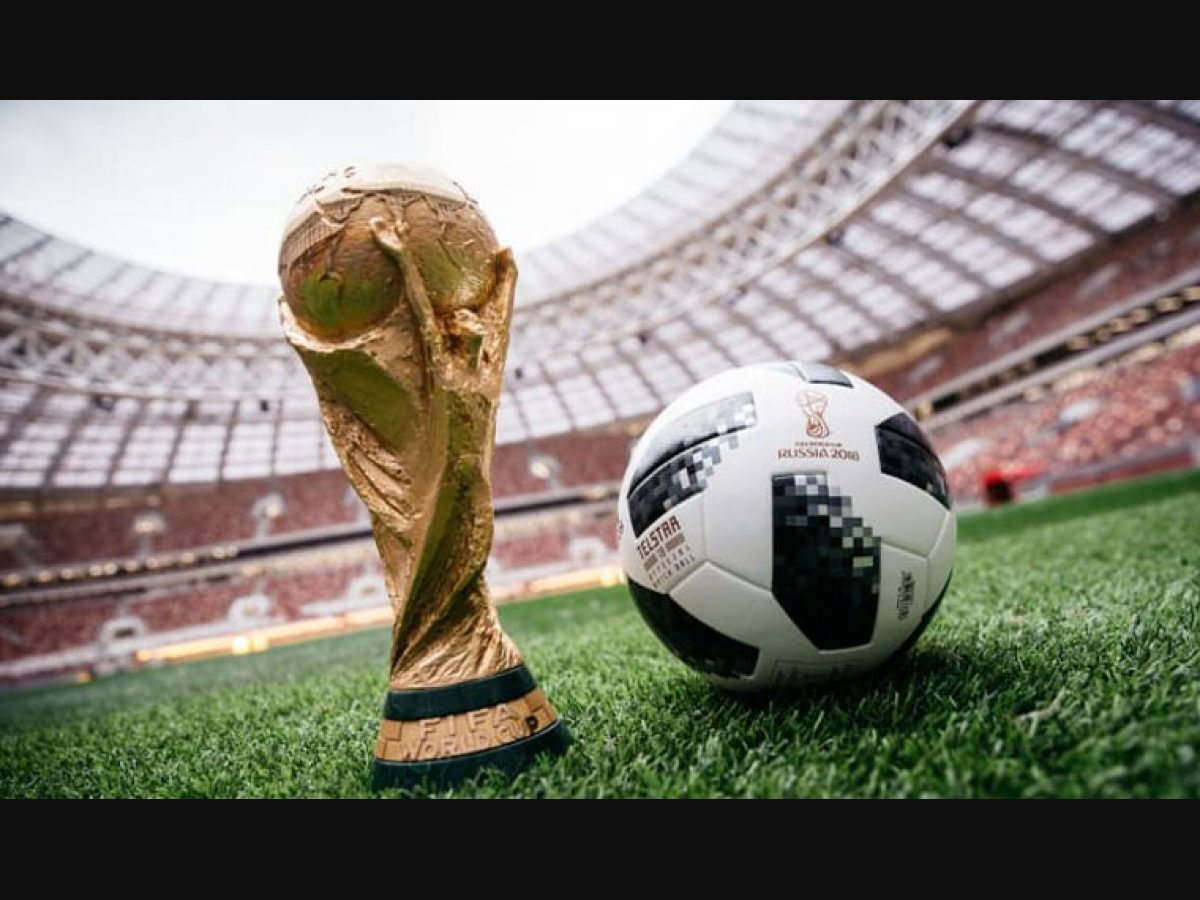

In [144]:
fifa_image = Image.open(r"C:\Users\srisa\Downloads\FIFA 2019.jpg")
fifa_image